# Micro-Credit Defaulter Model

### Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.


### Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  


### Points to Remember:
•	There are no null values in the dataset. 

•	There may be some customers with no loan history.

•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.

•	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.

•	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  

Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.


In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Data file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


In [3]:
# checking top 5 rows of the dataset
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [4]:
# checking bottom 5 rows of the dataset
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,17-06-2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,12-06-2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,29-07-2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,25-07-2016
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,07-07-2016


# Exploratory Data Analysis (EDA) :

In [5]:
# lets check the shape of the dataset
df.shape

(209593, 37)

In [6]:
# Lets check information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

Here we can see that there are no null or NaN values present in this dataset.

Here we can see a column name Unnamed:0 this column contains row no.'s which are by default present in jupyter notebook for all tables. so need of this column we can drop it.

In [7]:
# Lets check the name of the columns present in the dataset
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Here we can see names of all the columns present in the dataset.

In [8]:
# Lets check the presence of null values in the dataset
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Here we can see that there are no null values present in the dataset.

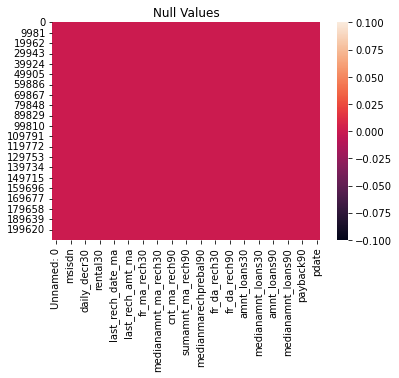

In [9]:
# lets visualize and verify presence of null values or not with the help of heatmap.
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

Here we can see red color heatmap which represents 0 and denotes that there is no null values present in this dataset.

In [10]:
# Lets check the datatype of each column present in the dataset.
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

Here we can see three types of datatypes present in this dataset i.e. integer, float and object.

Here we can also see column pdate which is in object format and we have to change its datatype to datetime.

Our target column label is integer datatype, so no need to do anything.

In [11]:
# lets check the no. of unique values present in each column
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            146328
daily_decr90            155483
rental30                131338
rental90                139036
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     23907
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     22694
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

Here we can see column Unnamed:0 which have all the unique values. so we will drop this column as we dont require this column as it specify serial no. of rows present in the column.

Here we can also observe some more columns, we can see msisdn which has more than 90% or 1,86,243 unique values present. this column have mobile no.'s which are not going to help us in prediction. so, we shall drop this column as well.

There are 4 more columns which we need to analyze more because they are having approx. 70% unique values present. those columns are daily_decr30, daily_decr90, rental30, rental90.

There is a column pcircle which is having only 1 unique value present in all the rows. it is not going to do any good for our model, so we should drop this column too.

In [12]:
# dropping the columns which are not needed for our model prediction
df.drop(['Unnamed: 0','msisdn','pcircle'],axis=1,inplace=True)

Here we have successfully dropped the columns which were not required to build our model

In [13]:
# Checking presence of space or empty observation inside any column of the dataset
for i in df.columns:
    print(df[i]=="  ")
    print("---------------------------------------------")

0         False
1         False
2         False
3         False
4         False
          ...  
209588    False
209589    False
209590    False
209591    False
209592    False
Name: label, Length: 209593, dtype: bool
---------------------------------------------
0         False
1         False
2         False
3         False
4         False
          ...  
209588    False
209589    False
209590    False
209591    False
209592    False
Name: aon, Length: 209593, dtype: bool
---------------------------------------------
0         False
1         False
2         False
3         False
4         False
          ...  
209588    False
209589    False
209590    False
209591    False
209592    False
Name: daily_decr30, Length: 209593, dtype: bool
---------------------------------------------
0         False
1         False
2         False
3         False
4         False
          ...  
209588    False
209589    False
209590    False
209591    False
209592    False
Name: daily_decr90, Length: 20

Here we can see that there is data imbalance in our target column label, we will use oversampling or undersampling to balance our target column.

Here in column last_rech_date_da which denotes no. of days till last recharge of data account, out of total 2,09,593 we have value 0.0 in 2,02,861 that means almost 97% rows are having value 0.0. we can drop this column.

There is one more column cnt_da_reach30 which denotes no. of times data account recharged in last 30 days, it is also having value 0.0 in 2,05,479 rows i.e. around 98% of rows have value as 0.0. we can drop this column too.

Column fr_da_rech30 which denotes frequency of data account recharged in last 30 days, is having 0.00 value in 2,08,014 rows close to 99% rows having value 0.0. we can drop this column too.

Column cnt_da_rech90 which denotes no. of times data account got recharged in last 90 days, is having 0 value in 2,04,226 rows which stands clost to 97.4% 0 values. we can drop this column too.

Column fr_da_rech90 which denotes frequency of main account got recharged in last 90 days.

Column medianamnt_loans30,median_amnt_loans90 which denotes Median of amount of recharges done in main account over last 30 days and 90 days at user level( in Indonasian Rupiah), is having 0.0 in 1,95,445 and 1,97,424 rows respectively, means 93.25% and 94.19% respectively of 0.0 value in whole column, we can drop these column too.

In [14]:
# Dropping all the columns which are having 0 values in more than 90% of rows.
df.drop(['last_rech_date_da','cnt_da_rech30','cnt_da_rech90','fr_da_rech30','fr_da_rech90','medianamnt_loans30','medianamnt_loans90'],axis=1,inplace=True)

Here we can see that we have successfully dropped the columns which were having more than 90% rows with value 0.

In [15]:
# lets convert date column datatype from object to datetime and then split that column into 3.
df['pdate']=pd.to_datetime(df['pdate'])

In [16]:
# lets check the datatype once again
df.dtypes

label                            int64
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_loans30                      int64
amnt_loans30                     int64
maxamnt_loans30                float64
cnt_loans90                    float64
amnt_loans90                     int64
maxamnt_loans90                  int64
payback30                      float64
payback90                

Here we can see that we have successfully changed the datatype of pdate which denotes date from dtype object to datetime.

In [17]:
# Now lets split date column into day,month and year
df['day']=pd.to_datetime(df.pdate,format='%d%m%y').dt.day
df['month']=pd.to_datetime(df.pdate,format='%d%m%y').dt.month
df['year']=pd.to_datetime(df.pdate,format='%d%m%y').dt.year

In [18]:
# Now lets drop the column pdate  from the dataset to avoid any duplication.
df.drop(['pdate'],axis=1,inplace=True)

In [19]:
# Lets check the first 5 rows of dataset again
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,day,month,year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,12,6.0,2.0,12,6,29.000000,29.000000,20,7,2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,12,12.0,1.0,12,12,0.000000,0.000000,8,10,2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,6,6.0,1.0,6,6,0.000000,0.000000,19,8,2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,12,6.0,2.0,12,6,0.000000,0.000000,6,6,2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,42,6.0,7.0,42,6,2.333333,2.333333,22,6,2016


In [20]:
# lets check presence of unique value again
df.nunique()

label                        2
aon                       4507
daily_decr30            146328
daily_decr90            155483
rental30                131338
rental90                139036
last_rech_date_ma         1186
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     23907
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     22694
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
payback30                 1363
payback90                 2381
day                         22
month                       12
year                         1
dtype: int64

Here we can see that column year is having only 1 unique value which is 2016, it wont help us in predicition lets drop this column too.

In [21]:
df.drop(['year'],axis=1,inplace=True)

Here we have successfully dropped the column year which was having only 1 value 2016 in all rows.

In [22]:
# lets check the statistical description of the dataset to know more.
df.describe(include='all')

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,day,month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,2064.452797,3.978057,3737.355121,...,2.758981,17.952021,274.658747,18.520919,23.645398,6.703134,3.398826,4.321485,14.584008,6.612253
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,2370.786034,4.256090,53643.625172,...,2.554502,17.379741,4245.264648,224.797423,26.469861,2.103864,8.813729,10.308108,7.953396,2.371940
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,770.000000,1.000000,0.000000,...,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,7.000000,6.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,1539.000000,3.000000,2.000000,...,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.666667,14.000000,7.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,2309.000000,5.000000,6.000000,...,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.750000,4.500000,21.000000,8.000000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,55000.000000,203.000000,999606.368100,...,50.000000,306.000000,99864.560860,4997.517944,438.000000,12.000000,171.500000,171.500000,31.000000,12.000000


Here we can see huge difference in mean and median most of the columns mean is more than median which denotes right skewed data.

we can also observe that standard deviation is very high in aon, daily_decr30,daily_decr90, rental30,rental90,last_rech_date_na,last_rech_amt_ma,fr_ma_rech30,medianmarechprebal90,maxamnt_loans30,cnt_loans90 which denotes that data is diversified.

Huge difference between 75% percentile and max in all the columns of the dataset except our target column label which denotes to presence of outliers in the dataset.

# Visualization:

## Univariate Analysis:

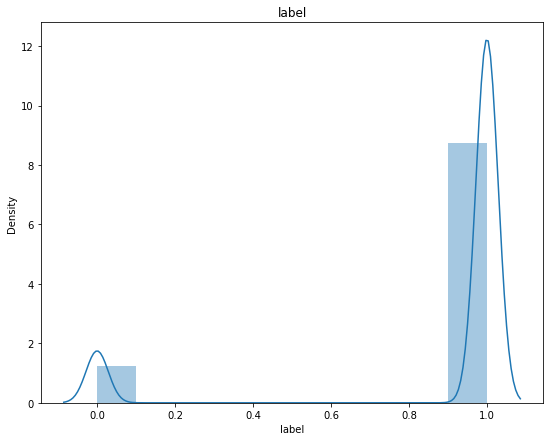

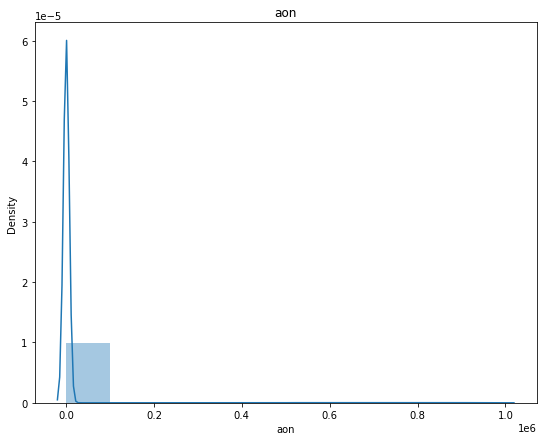

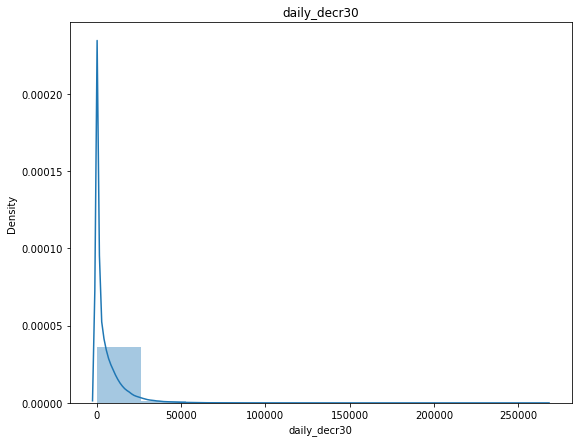

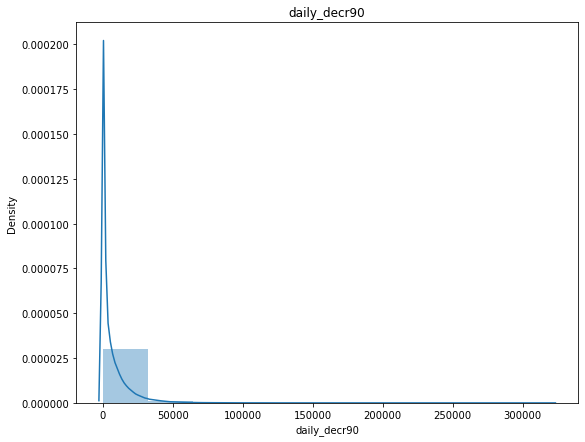

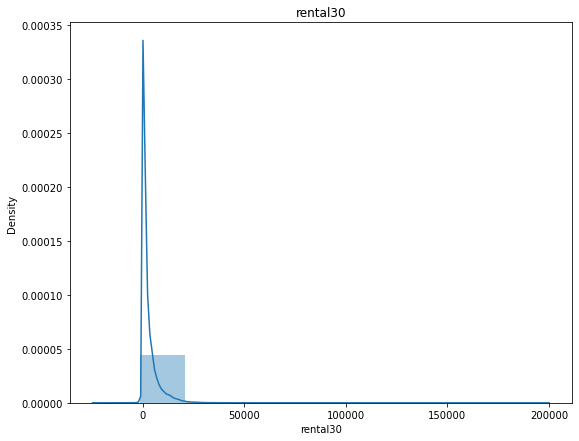

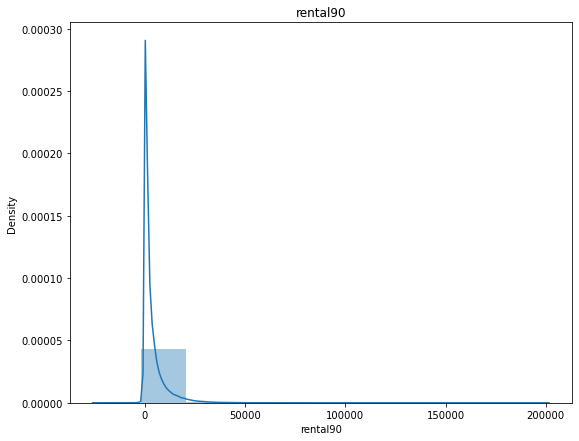

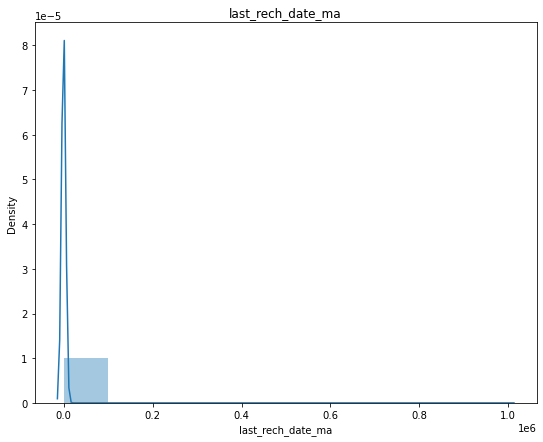

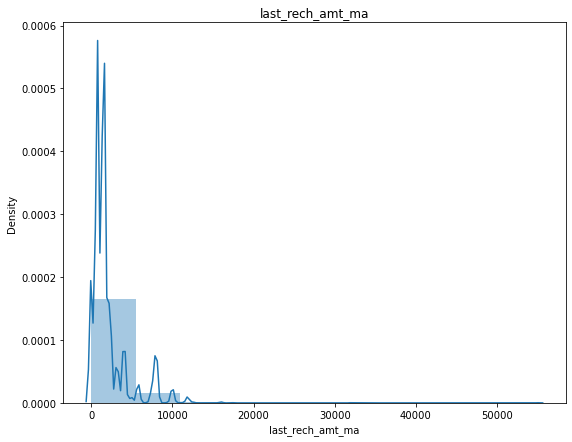

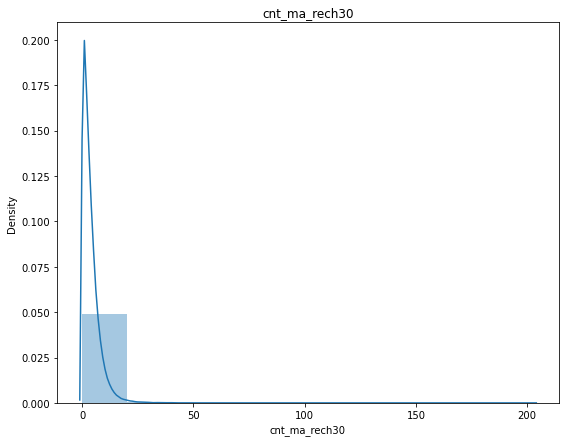

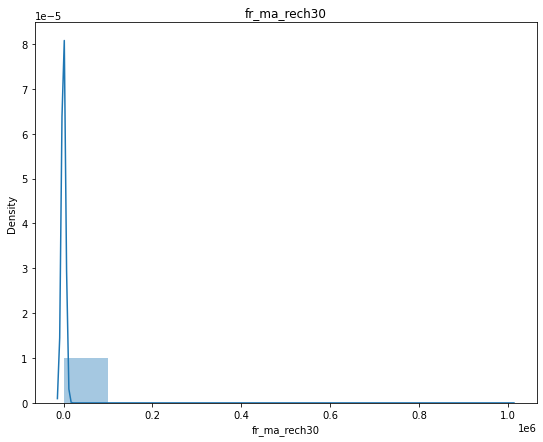

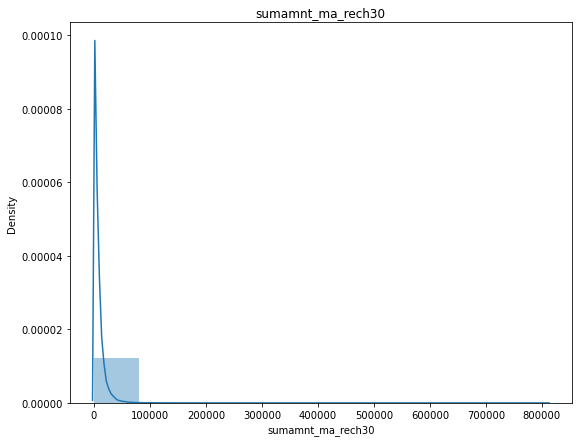

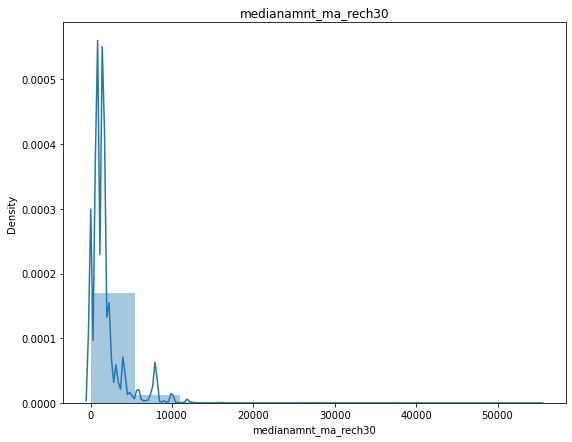

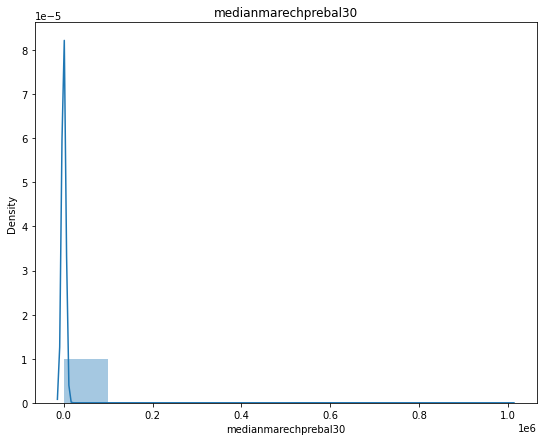

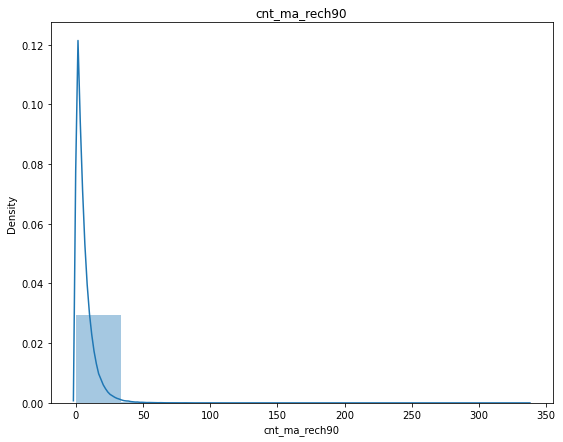

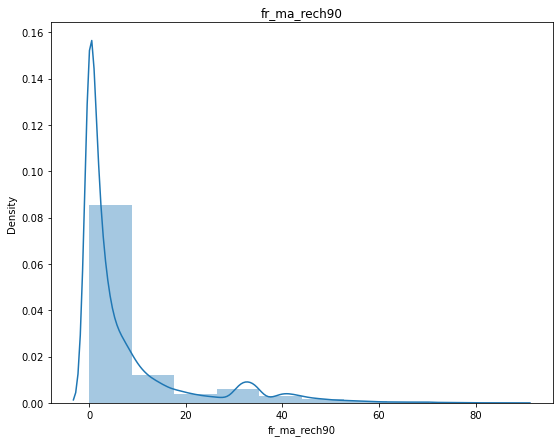

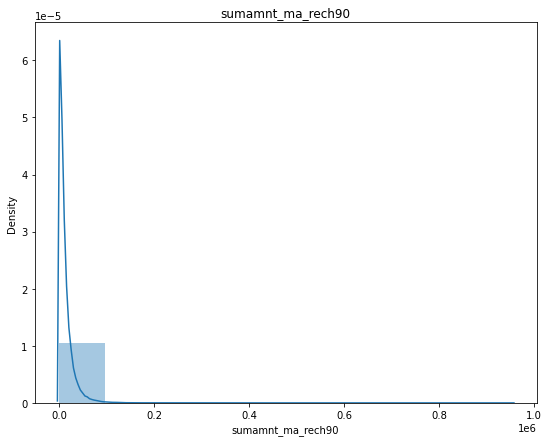

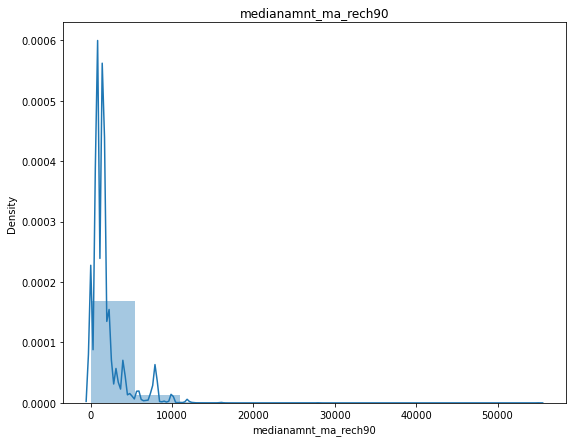

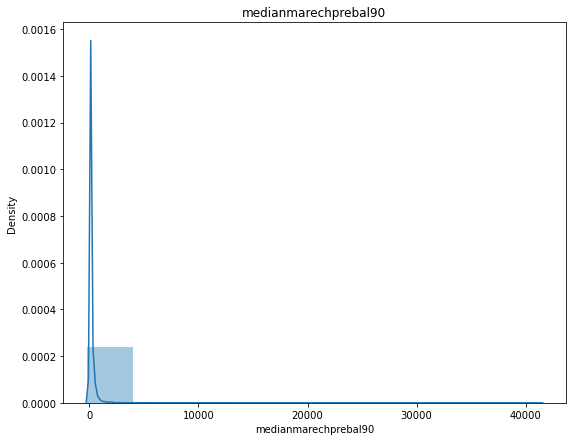

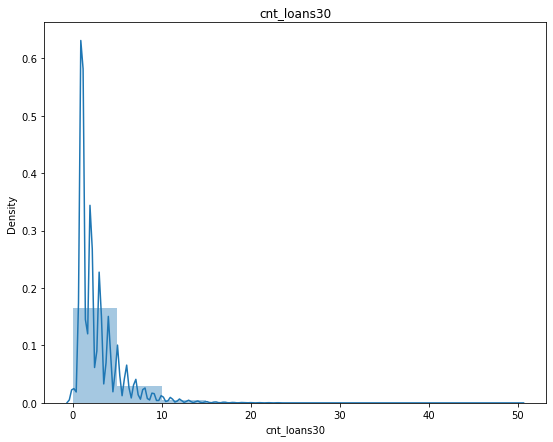

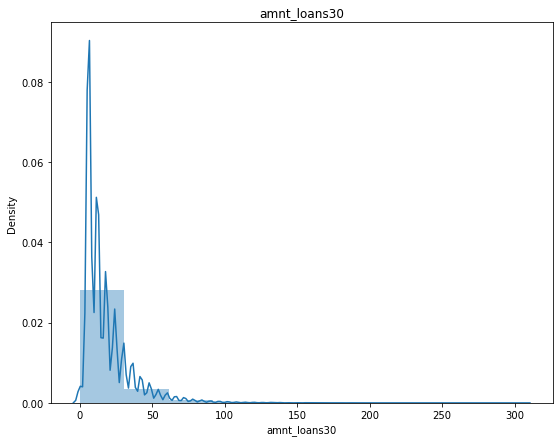

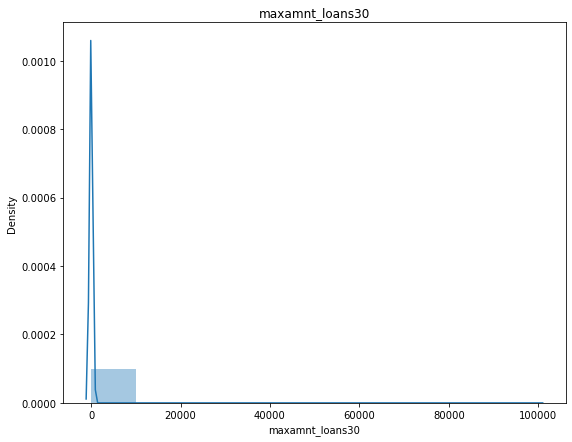

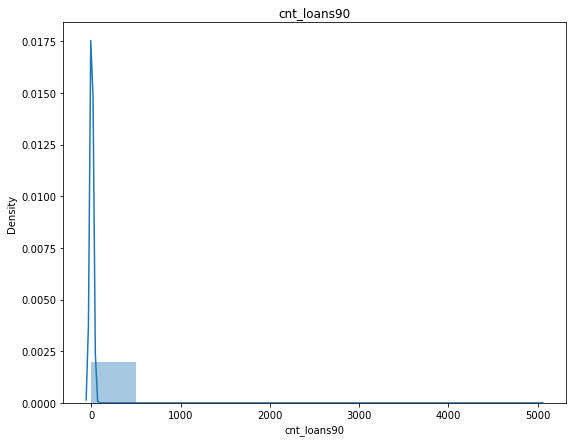

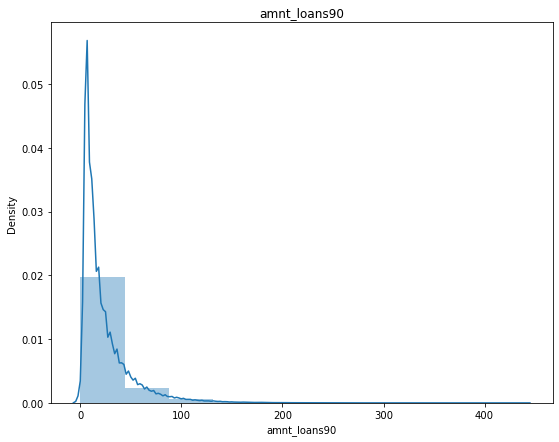

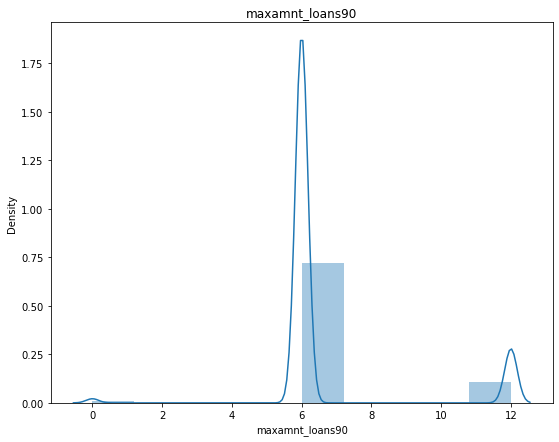

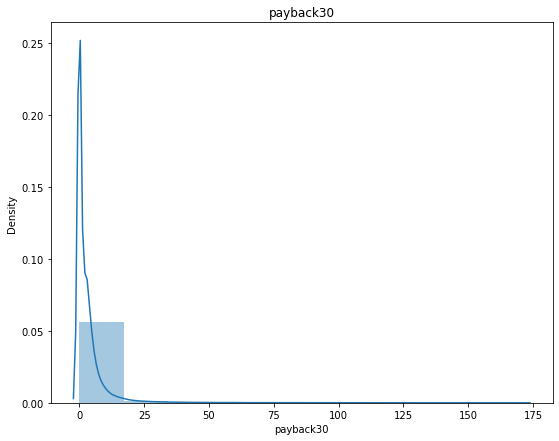

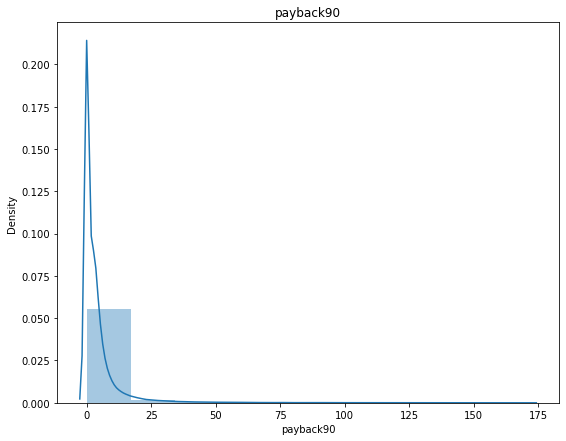

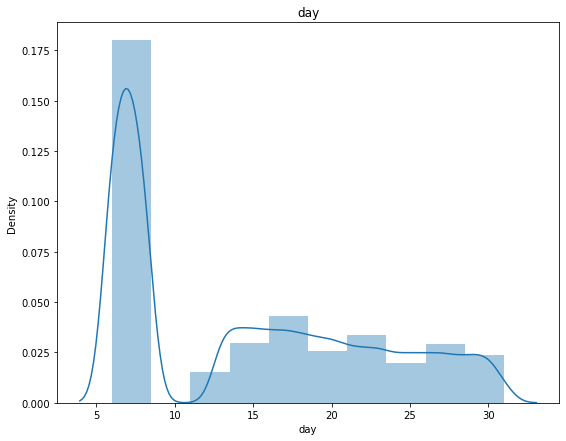

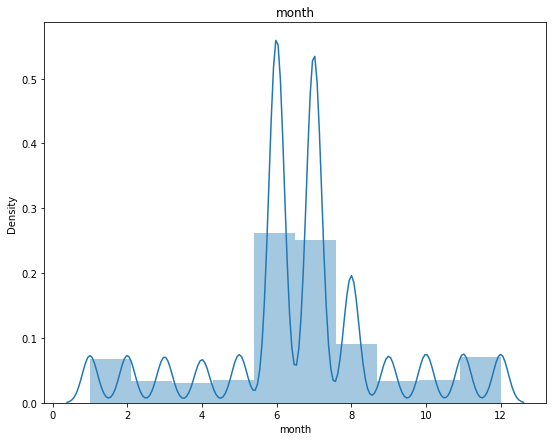

In [23]:
# lets visualize all columns in the dataset using distribution plot
for i in df.columns:
    plt.figure(figsize=(9,7))
    sns.distplot(df[i],bins=10)
    plt.title(i)
    plt.show()


We can see data imbalance in our target column which we will rectify later.

We can Skewness towards the left, in columns aon, daily_dect30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_amt_ma, cnt_ma_rech30, ft_ma_rech30, sunamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_loans30, amnt_loans30, maxamnt_loans30, cnt_loans90, amnt_loans90, payback30, payback90,.

maxamnt_loans90 column is skewed towards the right which denotes median is more than mean.

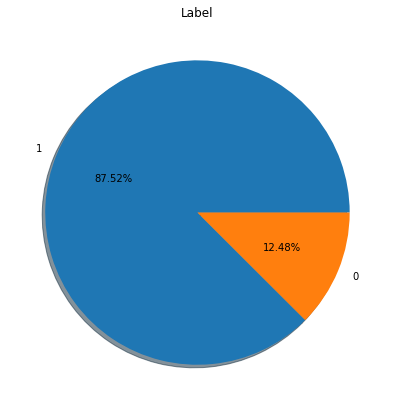

In [24]:
# lets visualize target columns in the dataset using pie plot
plt.figure(figsize=(9,7))
plt.pie(df['label'].value_counts(), labels=df['label'].value_counts().index,shadow=True,autopct='%1.2f%%')
plt.axis=('equal')
plt.title('Label')
plt.show()

Here we can see that there are only 2 values present in our target column i.e. 1 and 0 and we can clearly see data imbalance in this column. we will balance the data using oversampling method.

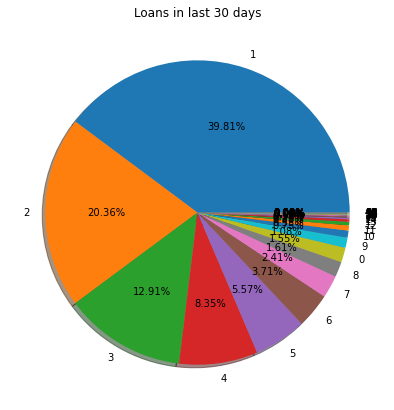

In [25]:
# lets visualize target columns in the dataset using pie plot
plt.figure(figsize=(9,7))
plt.pie(df['cnt_loans30'].value_counts(), labels=df['cnt_loans30'].value_counts().index,shadow=True,autopct='%1.2f%%')
plt.axis=('equal')
plt.title('Loans in last 30 days')
plt.show()

Here we can see that most as much as 39.81% of loan was taken on 1 and 20.36% on 2 and 12.91% on 3. almost 74% loan was taken in first 3 days of the month.

# Bivariate Analysis:

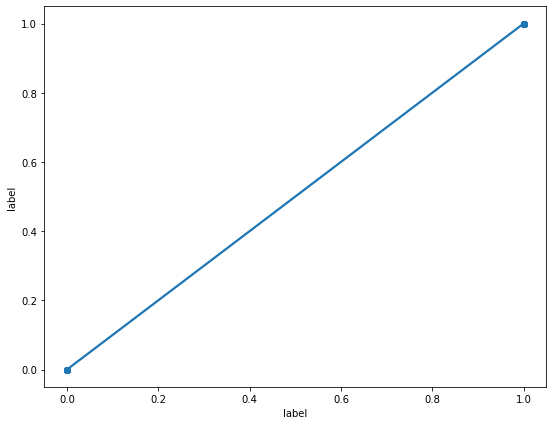

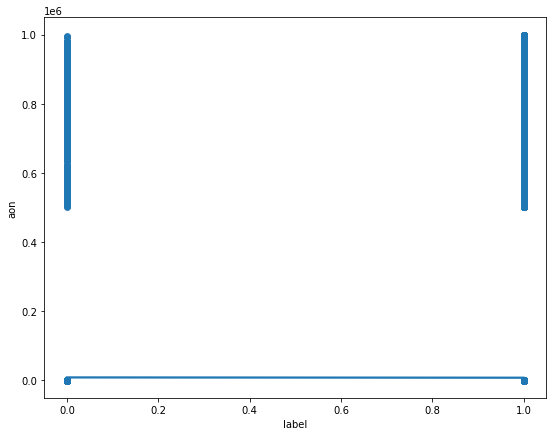

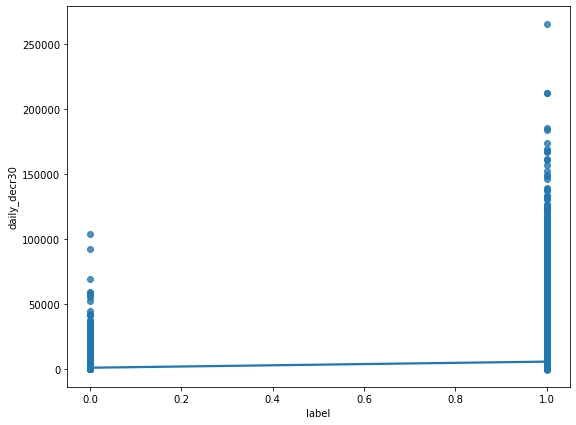

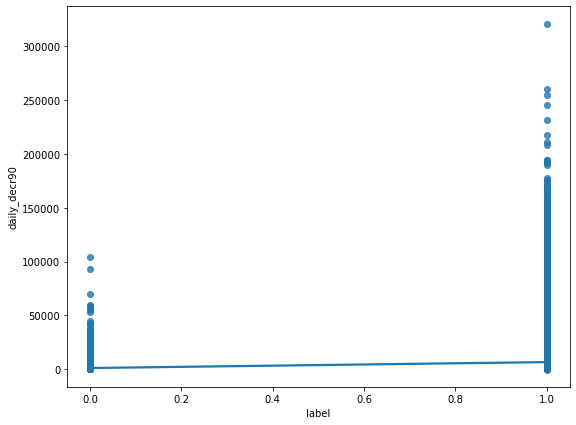

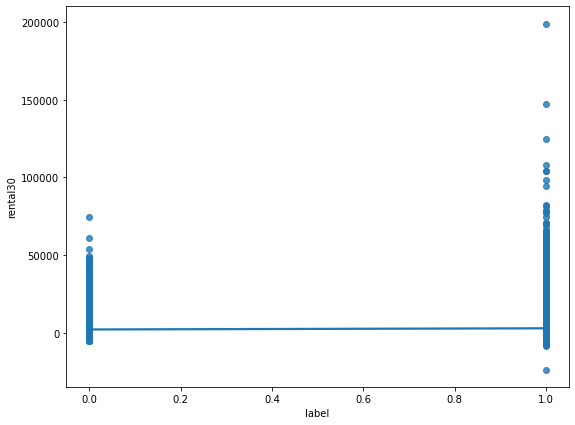

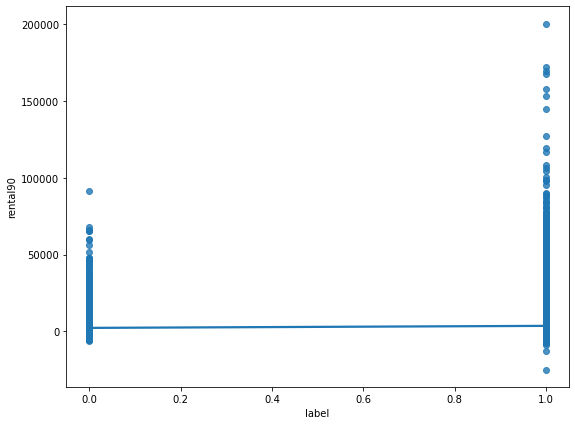

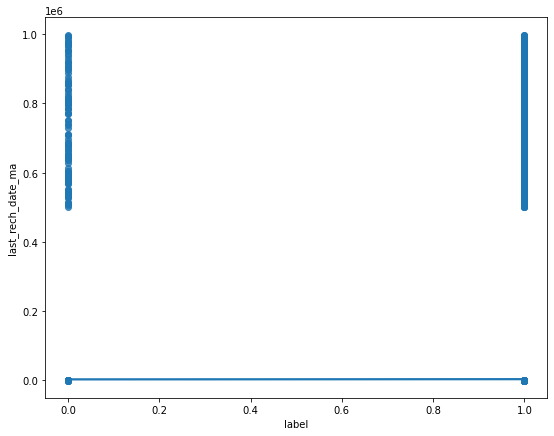

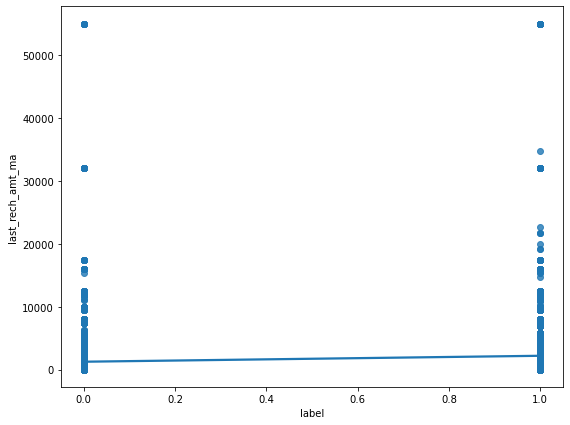

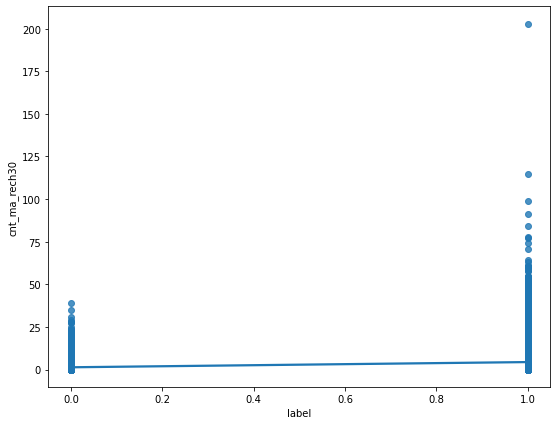

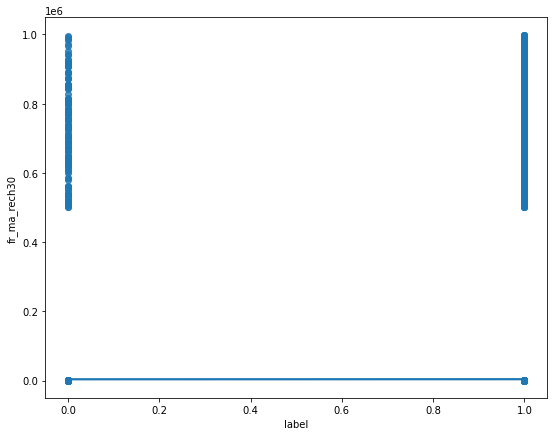

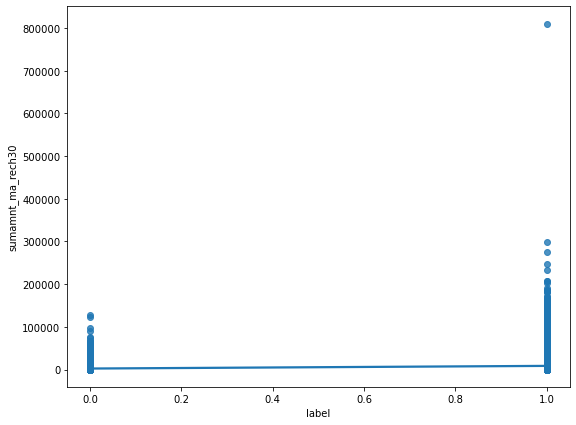

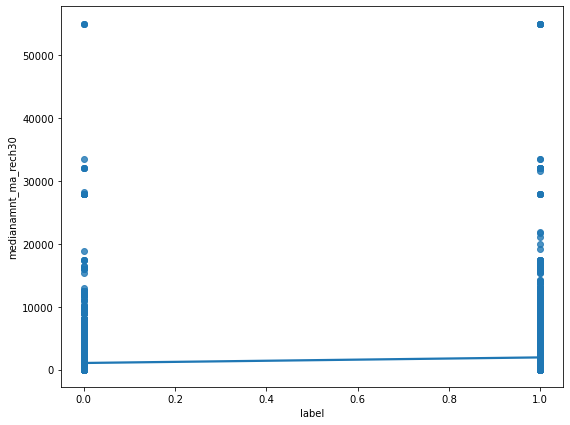

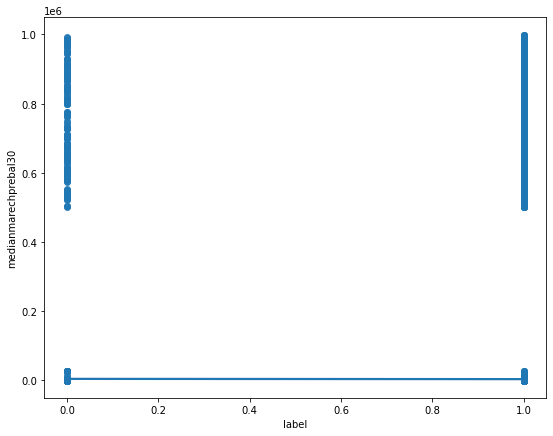

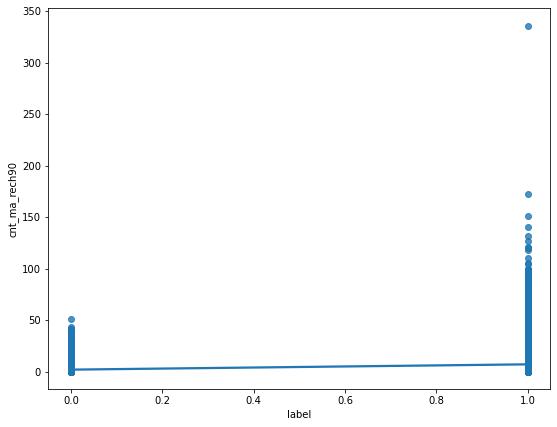

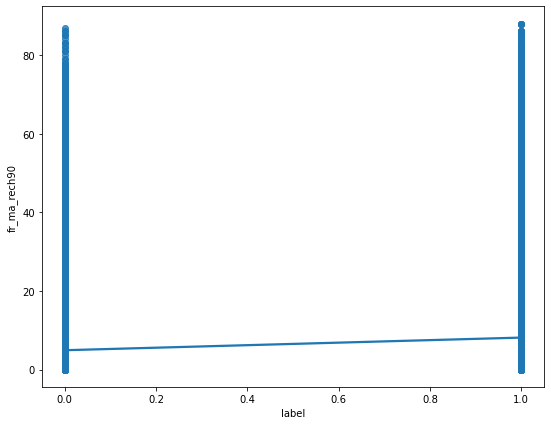

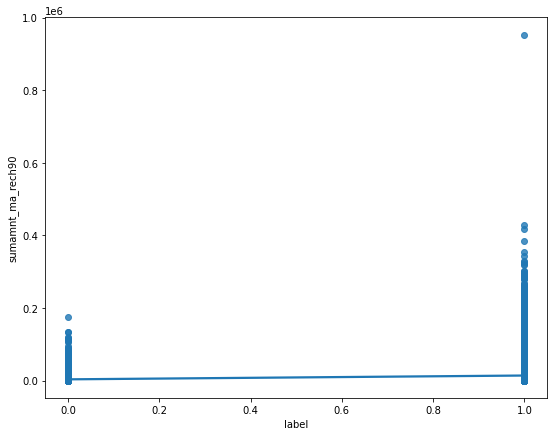

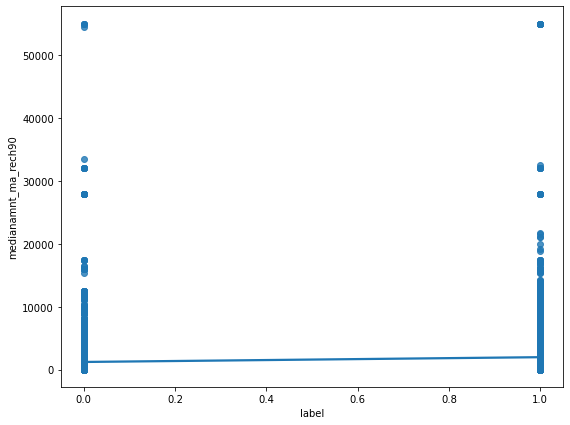

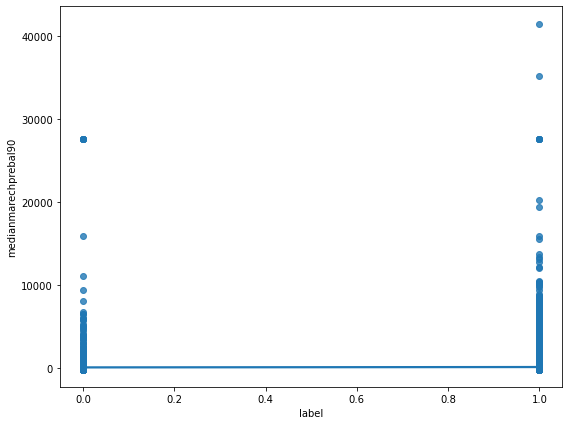

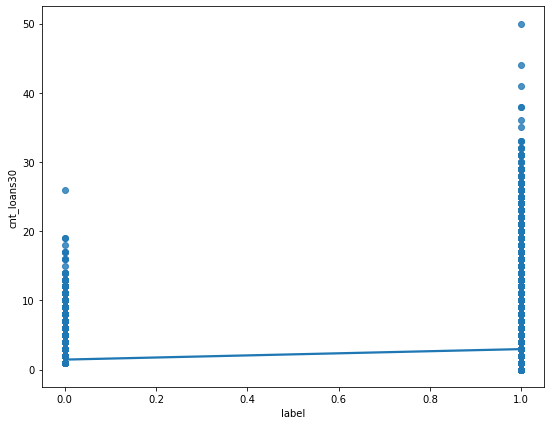

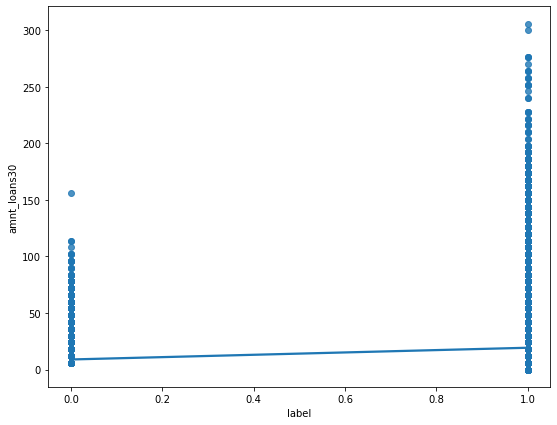

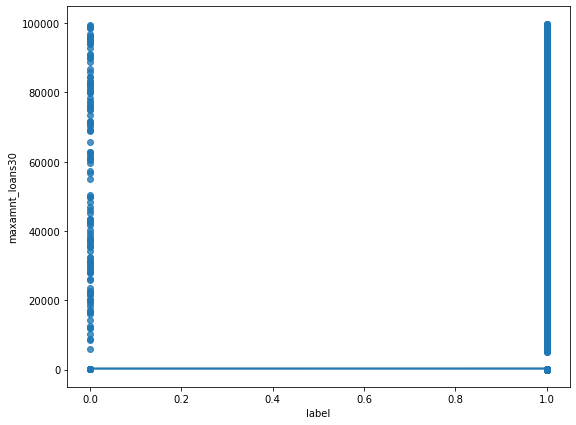

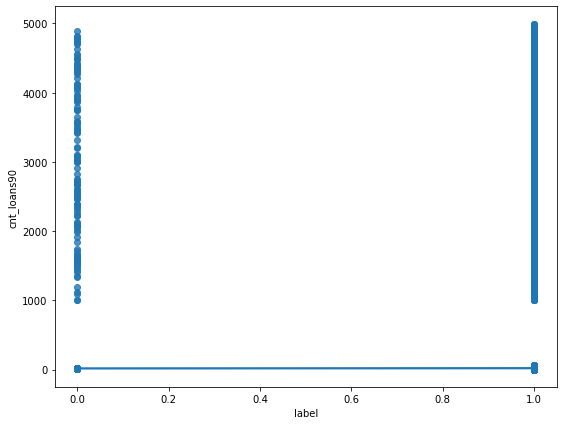

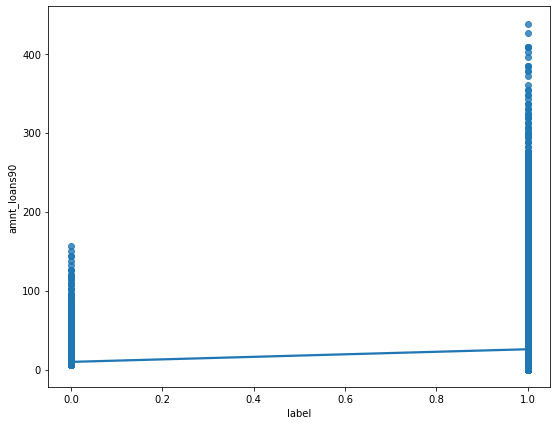

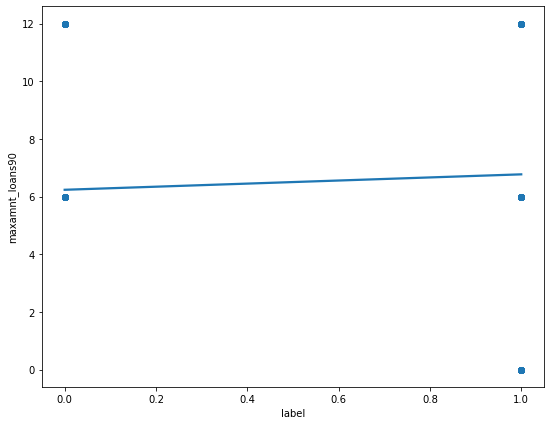

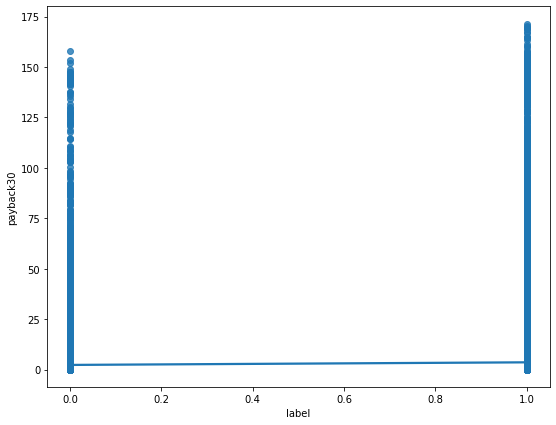

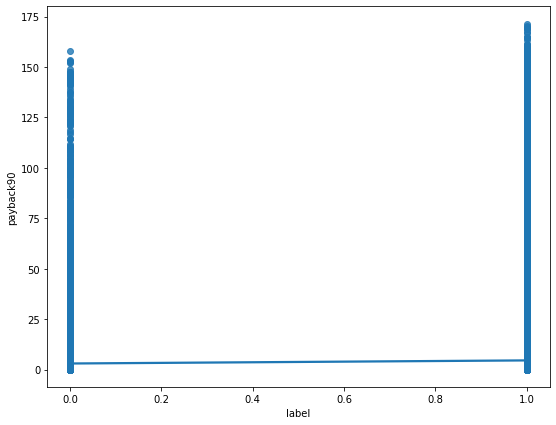

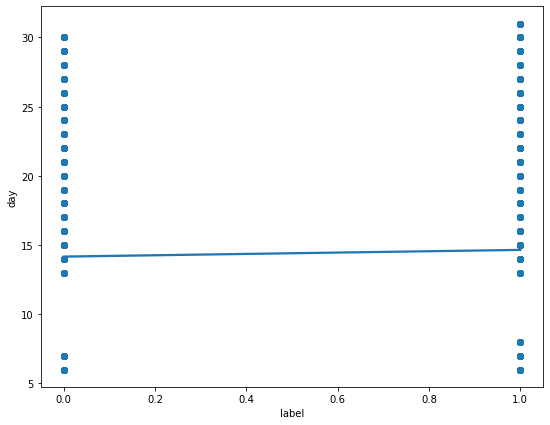

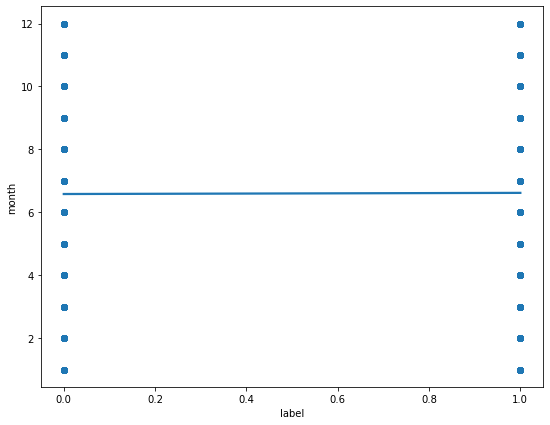

In [26]:
# Lets visualize the correlation of target column label with other columns present in the dataset using boxplot
for i in df.columns:
    plt.figure(figsize=(9,7))
    sns.regplot(df['label'],df[i],data=df)
    plt.show()


Here we can see Correlation of our target column with other columns present in the dataset.

Here looking at plot of label and age on cellular network in days, we can say that defaults can happen even if the user is using services from longtime.

Here correlation of target column label with columns daily_decr30, daily_decr90, rental30, rental90, last_rech_amt_ma, cnt_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, cnt_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebel90, cnt_loans30, amnt_loans30, amnt_loans 90, we can say that There are less no. defaulters and most of the users paid there dues on time.

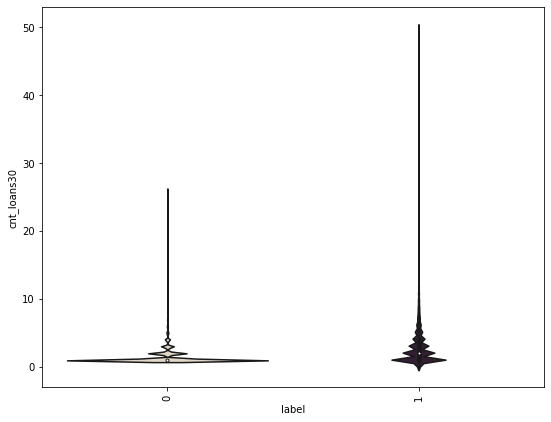

In [27]:
# lets check the correlation of label with cnt_loans30
plt.figure(figsize=(9,7))
sns.violinplot(x='label',y='cnt_loans30',data=df, palette='ch:.28')
plt.xticks(rotation=90)
plt.show()

Here we can see that the user who took loans in last 30 days paid back most of loans on time.

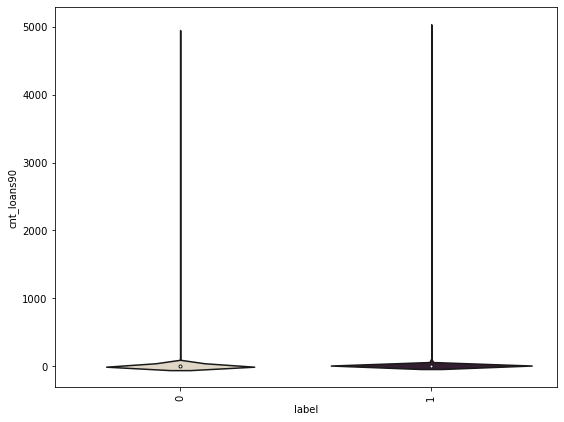

In [28]:
# lets check the correlation of label with cnt_loans90
plt.figure(figsize=(9,7))
sns.violinplot(x='label',y='cnt_loans90',data=df, palette='ch:.28')
plt.xticks(rotation=90)
plt.show()

Here we can observe that user who took loans in last 90 days was able to half of the loans on time while half users become defaulter as they couldn't pay back loan on time.

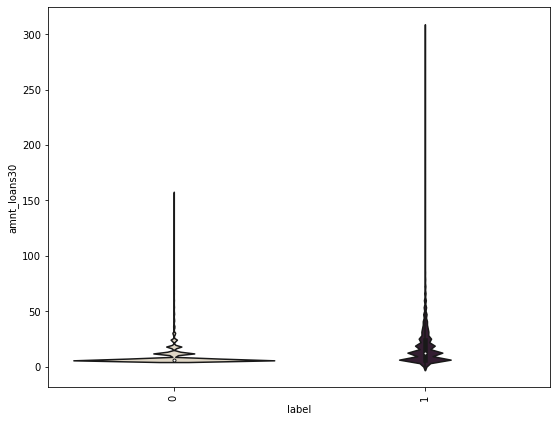

In [29]:
# lets check the correlation of label with amnt_loans30
plt.figure(figsize=(9,7))
sns.violinplot(x='label',y='amnt_loans30',data=df, palette='ch:.28')
plt.xticks(rotation=90)
plt.show()

Here we can observe that users paid most of the loans on time from total loans taken in 30 days, but they became defaulter in few loans.

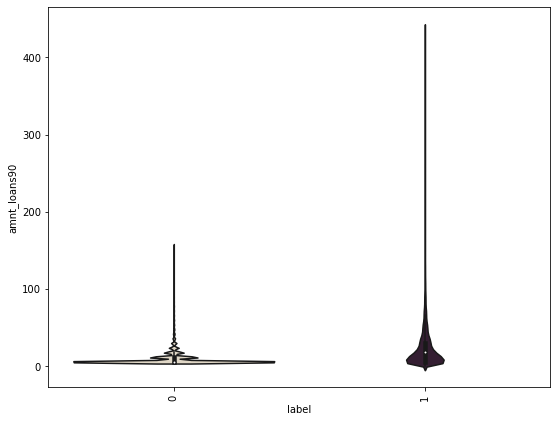

In [30]:
# lets check the correlation of label with amnt_loans90
plt.figure(figsize=(9,7))
sns.violinplot(x='label',y='amnt_loans90',data=df, palette='ch:.28')
plt.xticks(rotation=90)
plt.show()

Here we can see that users paid most of the loans on time from the total loans taken in last 90 days, but users became defaulters in paying back few loans.

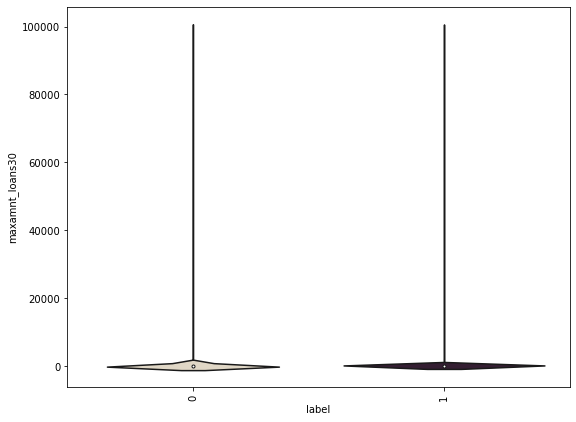

In [31]:
# lets check the correlation of label with maxamnt_loans30
plt.figure(figsize=(9,7))
sns.violinplot(x='label',y='maxamnt_loans30',data=df, palette='ch:.28')
plt.xticks(rotation=90)
plt.show()

Here we can observe that user was able to pay half of the amount of loan taken by him in last 30 days on time.

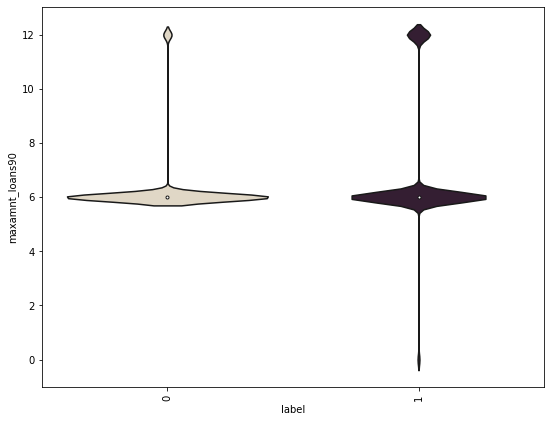

In [32]:
# lets check the correlation of label with maxamnt_loans90
plt.figure(figsize=(9,7))
sns.violinplot(x='label',y='maxamnt_loans90',data=df, palette='ch:.28')
plt.xticks(rotation=90)
plt.show()

Here we can observe that users paid all small amount loans on time, but were able to pay half of large amount loan on time.

# Multivariate Analysis:

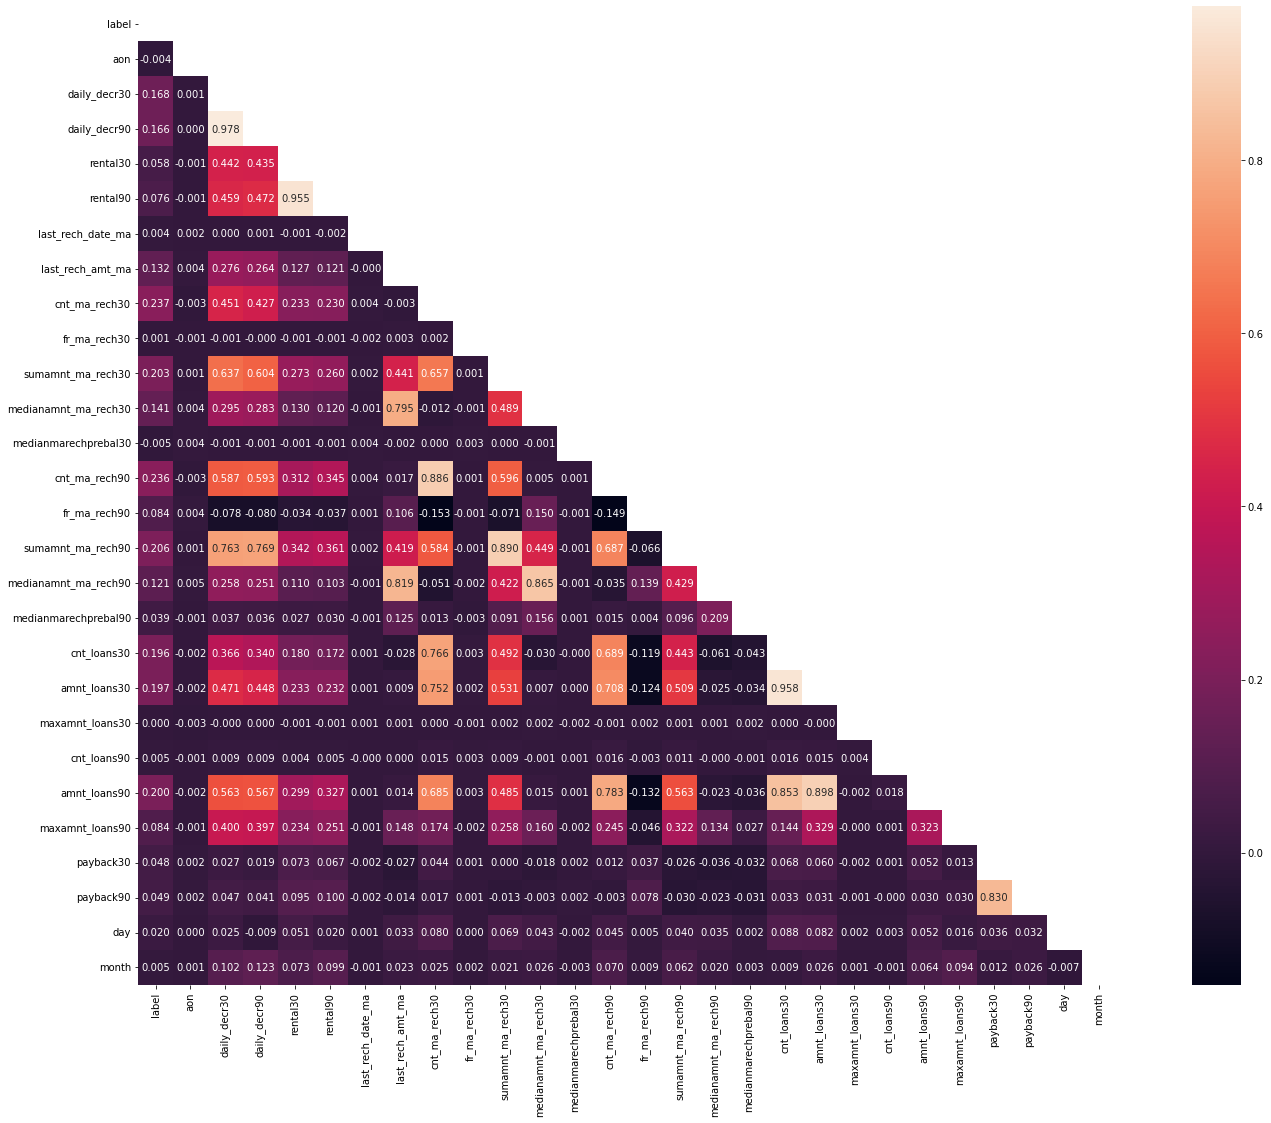

In [33]:
# lets visualize correlation of all the feature columns with target column 
tri= np.triu(df.corr())
plt.figure(figsize=(27,18))
sns.heatmap(df.corr(), annot=True, square=True, fmt='0.3f', mask=tri)
plt.xticks(rotation=90)
plt.show()

Here we can observe multicolinearity in some columns which we need to handle later.

here we can observe that our target column label shares very little relation with all other columns present in the dataset.

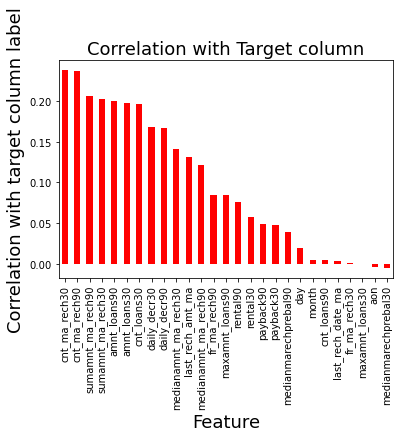

In [34]:
# Lets check correlation of all columns with target columns.
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar', color='r')
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Correlation with target column label', fontsize=18)
plt.title('Correlation with Target column', fontsize=18)
plt.show()

Here we can see that our target column label shares positive relation with all the columns except 3 columns.

In [35]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,day,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,2,12,6.0,2.0,12,6,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1,6,6.0,1.0,6,6,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,7,42,6.0,7.0,42,6,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048,3,2.0,...,2,12,6.0,2.0,12,6,1.000000,1.000000,17,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773,4,1.0,...,3,18,6.0,3.0,18,6,1.000000,1.000000,6,12
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,1539,5,8.0,...,4,42,12.0,6.0,54,12,4.000000,3.833333,29,7
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,773,5,4.0,...,2,18,12.0,3.0,24,12,0.000000,10.500000,25,7


# OutLiers:

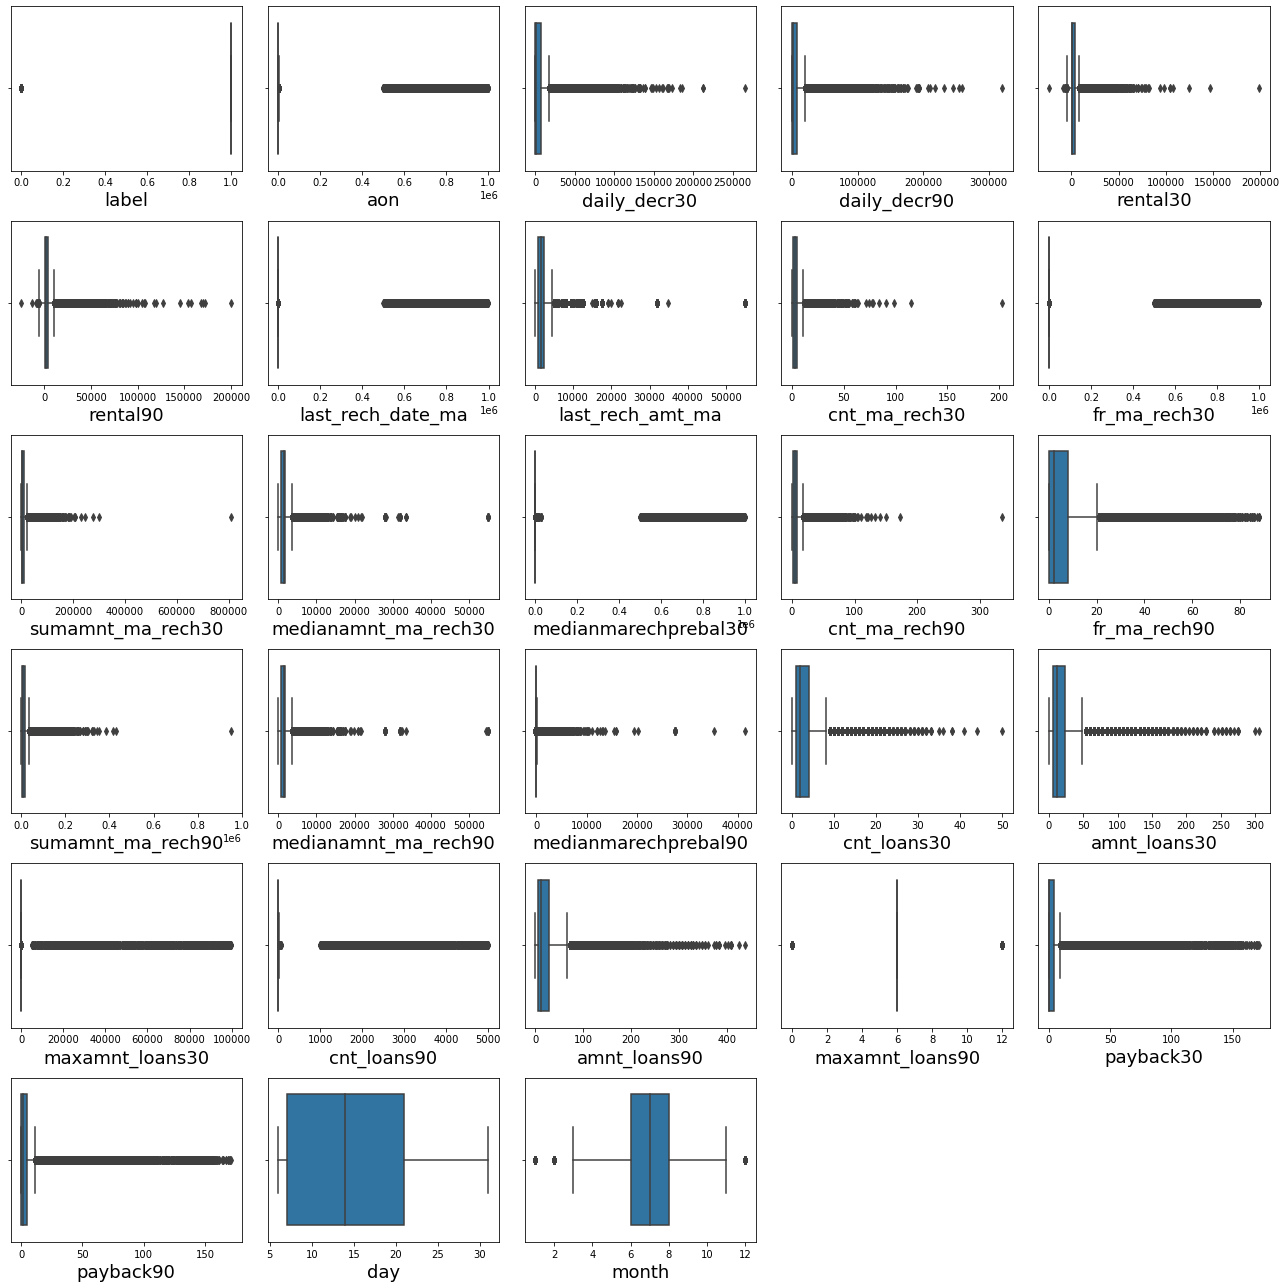

In [36]:
# lets check for the presence of outliers in numerical columns using box plot
plt.figure(figsize=(18,18))
num=1
for column in df.columns:
    if num<=28:
        ax=plt.subplot(6,5,num)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=18)
    num+=1
plt.tight_layout()

Here we can see presence of outliers in all the columns except day, month. we will try to remove outliers from all the columns except our target column.

# 1) ZScore Method:

In [37]:
# lets make a list of all features except day and month to remove outliers.
a=df[['aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_amt_ma','cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech90','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90','cnt_loans30','amnt_loans30','maxamnt_loans30','cnt_loans90','amnt_loans90','maxamnt_loans90','payback30','payback90']]

# lets remove outliers using ZScore Method
# importing required library for ZScore
from scipy.stats import zscore
# Lets execute zscore to remove outliers
z=np.abs(zscore(a))
z

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech90,...,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,0.103577,0.252299,0.276346,0.573844,0.558583,0.069637,0.221637,0.464760,0.069279,0.552756,...,0.156410,0.228933,0.297116,0.342470,0.063284,0.073493,0.439950,0.334212,2.904700,2.394093
1,0.097764,0.731037,0.553380,0.231788,0.036020,0.069303,1.570178,0.699718,0.069670,0.392058,...,1.884253,0.083923,0.688582,0.342470,0.061871,0.077941,0.439950,2.517690,0.385630,0.419233
2,0.100102,0.432011,0.429033,0.416020,0.447674,0.069619,0.221637,0.699718,0.069670,0.644049,...,0.156410,0.069622,0.688582,0.687700,0.063284,0.077941,0.666624,0.334212,0.385630,0.419233
3,0.103986,0.581326,0.555125,0.587935,0.576036,0.068914,0.471344,0.934677,0.069670,0.679166,...,0.440797,0.242476,0.297116,0.342470,0.063284,0.073493,0.439950,0.334212,0.385630,0.419233
4,0.094660,0.567293,0.543274,0.369886,0.413227,0.069600,0.103151,0.710030,0.069633,0.658438,...,0.491625,0.154451,1.660218,1.383682,0.063284,0.051250,0.693417,0.334212,0.120890,0.192873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.101833,0.567157,0.543159,0.372140,0.414910,0.069656,0.836664,0.229802,0.069633,0.118178,...,0.630936,0.000584,0.297116,0.342470,0.063284,0.073493,0.439950,0.334212,0.272170,0.322221
209589,0.092969,0.579622,0.553686,0.223791,0.304144,0.069600,0.544737,0.005156,0.069652,0.495809,...,0.524383,0.053558,0.094351,0.002761,0.063284,0.069044,0.213277,0.334212,0.272170,0.322221
209590,0.093788,0.700790,0.533194,0.735567,0.937500,0.069619,0.221637,0.240114,0.069521,0.367533,...,0.156410,0.121597,0.485818,1.383682,0.061871,0.055699,1.146764,2.517690,0.068209,0.047356
209591,0.084289,0.770755,0.594558,0.529352,0.433039,0.069637,0.544737,0.240114,0.069596,0.328916,...,0.262243,0.021598,0.297116,0.002761,0.061871,0.069044,0.013396,2.517690,0.385630,0.599385


Here we have successfully removed the outliers using zscore method.

In [38]:
# lets create new dataframe
df1=df[(z<3).all(axis=1)]
df1

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,day,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,2,12,6.0,2.0,12,6,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1,6,6.0,1.0,6,6,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,7,42,6.0,7.0,42,6,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048,3,2.0,...,2,12,6.0,2.0,12,6,1.000000,1.000000,17,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773,4,1.0,...,3,18,6.0,3.0,18,6,1.000000,1.000000,6,12
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,1539,5,8.0,...,4,42,12.0,6.0,54,12,4.000000,3.833333,29,7
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,773,5,4.0,...,2,18,12.0,3.0,24,12,0.000000,10.500000,25,7


In [39]:
#Lets check the shape of new dataframe
df1.shape

(171750, 28)

In [40]:
# lets check the data loss after removing outliers using zscore
loss=(((df.shape[0]-df1.shape[0])/df.shape[0])*100)
loss

18.05546940976082

Here we are losing huge amount of data using zscore which is 18.05% data.so, lets not remove outliers using zscore as it might affect our model working.

# 2)IQR Method:

In [41]:
# importing required libraries
from scipy.stats import iqr
# 1st quantile
Q1=a.quantile(0.25)

# 3rd quantile
Q3=a.quantile(0.75)

# IQR
IQR=Q3 - Q1

u_limit= Q3 + 1.5 * IQR
l_limit= Q1 - 1.5 * IQR

In [42]:
df_1=a[~((a < l_limit) | (a > u_limit)).any(axis=1) ]

In [43]:
df_1.shape

(77749, 25)

In [44]:
# lets check the dataloss
dataloss=(((df.shape[0]-df_1.shape[0])/df.shape[0])*100)
dataloss

62.90477258305383

Here we are losing 62.90 data while using IQR method. so we will not use IQR method to remove outliers.

# 3) Percentile Method:

In [45]:
# lets try and Remove outliers using percentile method
for i in a:
    if df[i].dtypes != 'object':
        b=df[i].quantile([0.01,0.98]).values
        df[i][df[i]<=b[0]]=b[0]  
        df[i][df[i]>=b[1]]=b[1]

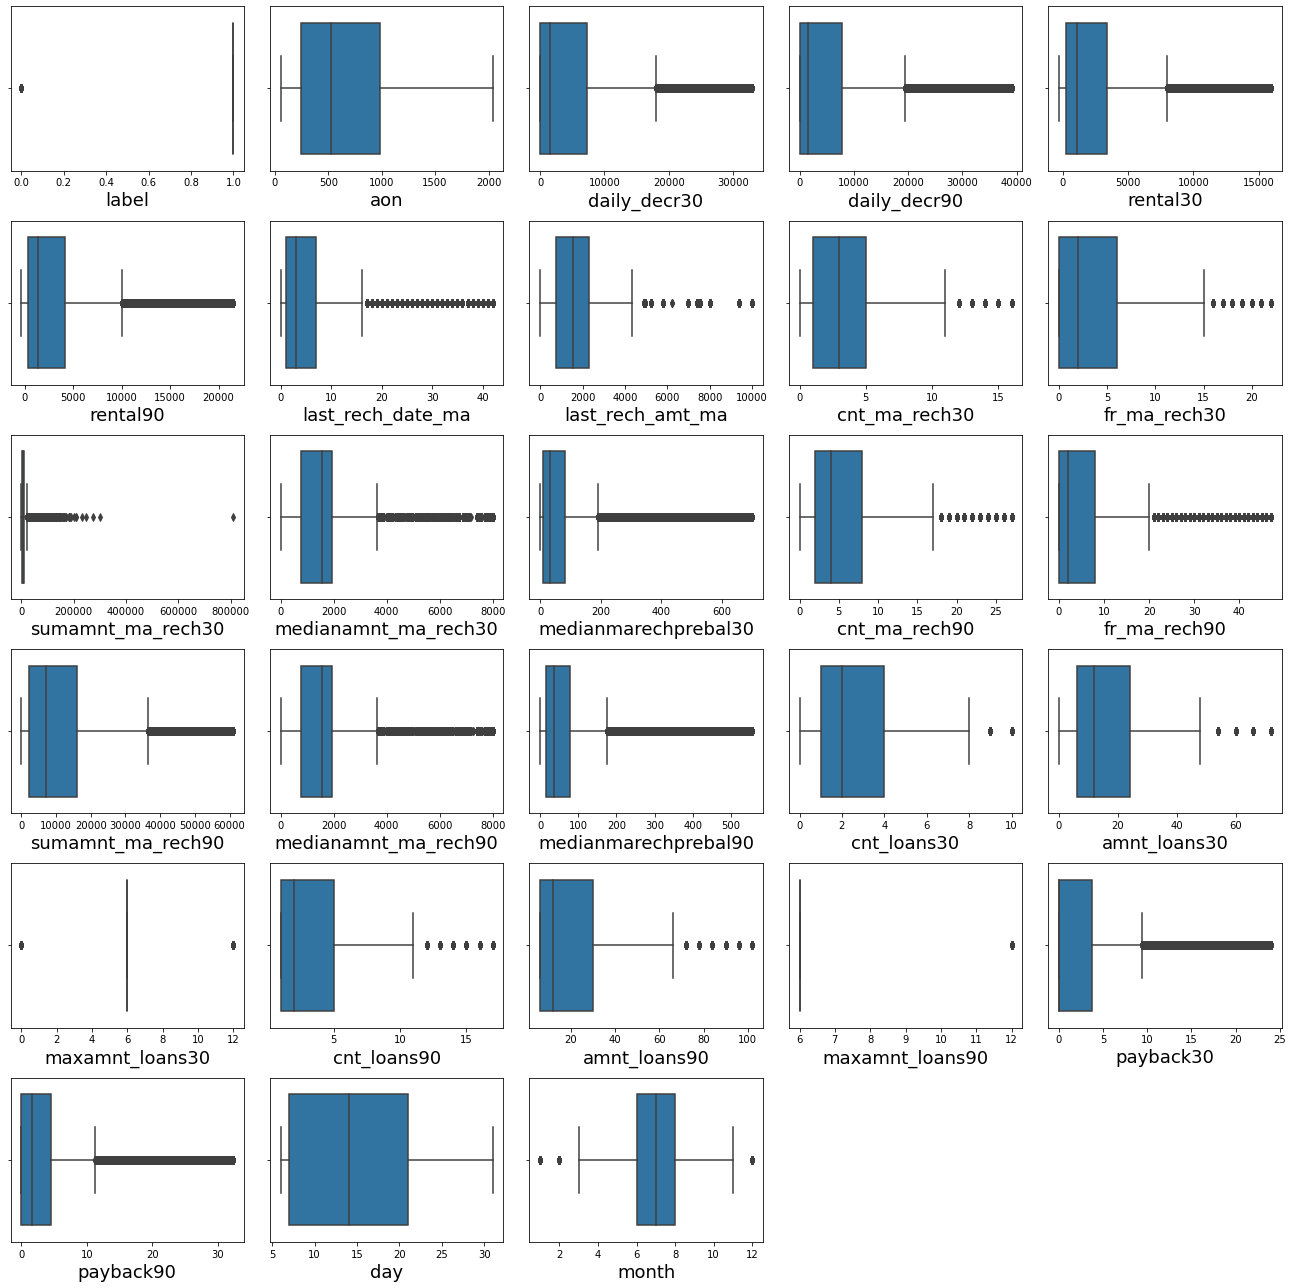

In [46]:
plt.figure(figsize=(18,18))
num=1
for column in df.columns:
    if num<=28:
        ax=plt.subplot(6,5,num)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=18)
    num+=1
plt.tight_layout()

Here we can see that, we could not remove all the outliers as we were losing lot of data, so we used percentile method to reduce the some of the extreme outliers present in our dataset.

# Skewness:

In [47]:
# lets check for skewness in the dataframe
df.skew()

label                  -2.270254
aon                     0.935197
daily_decr30            1.974394
daily_decr90            2.091659
rental30                2.106223
rental90                2.194864
last_rech_date_ma       2.615836
last_rech_amt_ma        2.080016
cnt_ma_rech30           1.415594
fr_ma_rech30            1.703205
sumamnt_ma_rech30       6.386787
medianamnt_ma_rech30    2.115971
medianmarechprebal30    2.830858
cnt_ma_rech90           1.569282
fr_ma_rech90            1.985638
sumamnt_ma_rech90       1.863524
medianamnt_ma_rech90    2.133303
medianmarechprebal90    2.666638
cnt_loans30             1.576547
amnt_loans30            1.733837
maxamnt_loans30         1.405285
cnt_loans90             1.923139
amnt_loans90            1.840032
maxamnt_loans90         2.241299
payback30               2.648819
payback90               2.829305
day                     0.473378
month                  -0.096092
dtype: float64

Here also we can see that skewness is present in all the columns except day and month.

We will not remove skewness in label column as it is our target column.

In [48]:
# Lets make list of columns with skewness
skew=['aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_amt_ma','cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90','cnt_loans30','amnt_loans30','maxamnt_loans30','cnt_loans90','amnt_loans90','maxamnt_loans90','payback30','payback90']
# importing required library
from sklearn.preprocessing import PowerTransformer
# lets remove skewness using yeo-johnson method
scaler=PowerTransformer(method='yeo-johnson')
'''
parameters:
method='box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod='box-cox' or 'yeo-johnson'\n"

In [49]:
df[skew]=scaler.fit_transform(df[skew].values)
df[skew]

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,-0.696438,0.493155,0.470041,-0.653011,-0.638396,-0.318148,0.081985,-0.292754,1.713444,-0.177906,...,0.147199,-0.830131,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-1.948303e-13,1.785799,1.821484
1,0.388296,1.119549,1.071131,0.499346,0.280078,1.551138,1.531119,-0.813308,-1.125020,0.219811,...,1.751936,0.380302,-0.917748,-0.105640,2.275299,-1.129610,-0.195308,1.340081e-12,-0.938528,-1.019522
2,0.042606,0.176750,0.161924,-0.349829,-0.409481,0.009030,0.081985,-0.813308,-1.125020,-0.535362,...,0.147199,0.438673,-0.917748,-0.905221,-0.269609,-1.129610,-1.184033,-1.948303e-13,-0.938528,-1.019522
3,-0.817739,-1.123765,-1.121318,-0.688460,-0.685134,2.051429,-0.297745,-1.676293,-1.125020,-1.902189,...,-0.264481,-1.258848,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-1.948303e-13,-0.938528,-1.019522
4,0.754834,-0.591620,-0.591349,-0.275861,-0.349346,0.249421,0.454627,1.016428,0.160683,1.262660,...,0.808981,0.010082,1.608532,1.499492,-0.269609,1.235280,1.166897,-1.948303e-13,0.640306,0.428035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.277218,-0.589096,-0.588854,-0.279385,-0.352211,-0.814508,1.069436,0.083815,0.160683,0.664001,...,0.924348,0.675615,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-1.948303e-13,0.092407,-0.104773
209589,0.925010,-0.986372,-0.983738,-0.062133,-0.175683,0.249421,-0.437741,0.380110,-0.270330,-0.175310,...,-0.415078,0.825560,0.557541,0.394877,-0.269609,0.340924,0.305428,-1.948303e-13,0.092407,-0.104773
209590,0.844700,1.108188,1.062561,1.029157,1.242338,0.009030,0.081985,0.624962,1.118037,0.575767,...,0.147199,0.203629,0.935485,1.499492,2.275299,1.095711,1.378295,1.340081e-12,0.979695,0.754284
209591,1.607797,1.134119,1.088187,-0.555095,-0.383530,-0.318148,-0.437741,0.624962,0.641001,0.795555,...,0.602319,0.740052,0.005250,0.394877,2.275299,0.340924,0.625139,1.340081e-12,-0.938528,1.354948


In [50]:
# lets check the skewness again
df.skew()

label                  -2.270254
aon                    -0.059160
daily_decr30           -0.143090
daily_decr90           -0.132714
rental30                0.720837
rental90                0.757030
last_rech_date_ma       0.043786
last_rech_amt_ma       -0.096659
cnt_ma_rech30          -0.010127
fr_ma_rech30            0.133182
sumamnt_ma_rech30      -0.291322
medianamnt_ma_rech30   -0.239052
medianmarechprebal30   -0.046675
cnt_ma_rech90          -0.012068
fr_ma_rech90            0.140655
sumamnt_ma_rech90      -0.265440
medianamnt_ma_rech90   -0.100228
medianmarechprebal90   -0.032049
cnt_loans30             0.042626
amnt_loans30            0.006048
maxamnt_loans30         0.399869
cnt_loans90             0.206928
amnt_loans90            0.133935
maxamnt_loans90         0.000000
payback30               0.287988
payback90               0.201580
day                     0.473378
month                  -0.096092
dtype: float64

Here we can observe that we have successfully removed skewness from most of the columns, but still there is skewness present in some of the columns like, maxamnt_loans90 where skewness is as it is, skewness is reduced but still present in columns rental30 and rental90. all other scores are in ideal range of +/-0.50.

Now lets move ahead

# Scaling:

In [51]:
# lets first separate target column and features column
x=df.drop('label',axis=1)
y=df['label']

In [52]:
# Importing all required libraries for standard scaler
from sklearn.preprocessing import StandardScaler
#lets scale the data using standard scaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [53]:
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,day,month
0,-0.696438,0.493155,0.470041,-0.653011,-0.638396,-0.318148,0.081985,-0.292754,1.713444,-0.177906,...,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-0.381303,1.785799,1.821484,0.680968,0.163473
1,0.388296,1.119549,1.071131,0.499346,0.280078,1.551138,1.531119,-0.813308,-1.125020,0.219811,...,-0.917748,-0.105640,2.275299,-1.129610,-0.195308,2.622586,-0.938528,-1.019522,-0.827825,1.428263
2,0.042606,0.176750,0.161924,-0.349829,-0.409481,0.009030,0.081985,-0.813308,-1.125020,-0.535362,...,-0.917748,-0.905221,-0.269609,-1.129610,-1.184033,-0.381303,-0.938528,-1.019522,0.555235,0.585070
3,-0.817739,-1.123765,-1.121318,-0.688460,-0.685134,2.051429,-0.297745,-1.676293,-1.125020,-1.902189,...,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-0.381303,-0.938528,-1.019522,-1.079291,-0.258124
4,0.754834,-0.591620,-0.591349,-0.275861,-0.349346,0.249421,0.454627,1.016428,0.160683,1.262660,...,1.608532,1.499492,-0.269609,1.235280,1.166897,-0.381303,0.640306,0.428035,0.932433,-0.258124


Here we can see that we have successfully scaled the data.

# Multicolinearity:

In [54]:
# lets check the multicolinearity issue using VIF 
# importing all required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_feat"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_feat,Features
0,1.037522,aon
1,403.943051,daily_decr30
2,421.365171,daily_decr90
3,18.128117,rental30
4,19.504079,rental90
5,1.877465,last_rech_date_ma
6,6.537472,last_rech_amt_ma
7,39.462765,cnt_ma_rech30
8,2.033642,fr_ma_rech30
9,58.036054,sumamnt_ma_rech30


Here we are sure about presence of multicolinearity issue in the dataset.

The ideal vif value should be under 10.

Lets drop column daily_decr90 its vif value very high it is 488.42

In [55]:
x=x.drop(['daily_decr90'],axis=1)

In [56]:
# lets check the vif values again
vif=pd.DataFrame()
vif["vif_feat"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_feat,Features
0,1.037509,aon
1,2.595979,daily_decr30
2,17.125271,rental30
3,18.262134,rental90
4,1.876891,last_rech_date_ma
5,6.530563,last_rech_amt_ma
6,39.374966,cnt_ma_rech30
7,2.033391,fr_ma_rech30
8,57.567492,sumamnt_ma_rech30
9,15.122938,medianamnt_ma_rech30


Here we can see there are still presence of mulitcolinearity.

Lets drop column amnt_loans30 with very high score of 114.18.

In [57]:
x=x.drop(['amnt_loans30'],axis=1)

In [58]:
# lets check the vif score once again
vif=pd.DataFrame()
vif["vif_feat"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_feat,Features
0,1.037475,aon
1,2.595781,daily_decr30
2,17.122178,rental30
3,18.253622,rental90
4,1.870365,last_rech_date_ma
5,6.529868,last_rech_amt_ma
6,39.368346,cnt_ma_rech30
7,2.017926,fr_ma_rech30
8,57.445954,sumamnt_ma_rech30
9,15.050986,medianamnt_ma_rech30


Here we can see there is still presence of multicolinearity, lets drop the column with highest VIF value i.e sumamnt_ma_rech30


In [59]:
x=x.drop(['sumamnt_ma_rech30'],axis=1)

In [60]:
# lets again check the vif score
vif=pd.DataFrame()
vif["vif_feat"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_feat,Features
0,1.037394,aon
1,2.595770,daily_decr30
2,17.003934,rental30
3,18.137970,rental90
4,1.846593,last_rech_date_ma
5,6.408425,last_rech_amt_ma
6,12.455844,cnt_ma_rech30
7,2.012065,fr_ma_rech30
8,5.980223,medianamnt_ma_rech30
9,4.802027,medianmarechprebal30


Here we can still see presence of multicolienearity in 2 columns.

lets drop the one with high VIF value, i.e.amnt_loans90 with score of 39.20.


In [61]:
x=x.drop(['amnt_loans90'],axis=1)

In [62]:
vif=pd.DataFrame()
vif["vif_feat"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_feat,Features
0,1.036697,aon
1,2.550517,daily_decr30
2,16.989638,rental30
3,18.125063,rental90
4,1.845986,last_rech_date_ma
5,6.408050,last_rech_amt_ma
6,12.288165,cnt_ma_rech30
7,2.010805,fr_ma_rech30
8,5.973947,medianamnt_ma_rech30
9,4.798096,medianmarechprebal30



Here we can see that we still have some columns with high vif scores.

Now, lets drop cnt_ma_rech90 with vif score of 27.80

In [63]:
x=x.drop(['cnt_ma_rech90'], axis=1)

In [64]:
# lets check the Vif scores once again
vif=pd.DataFrame()
vif["vif_feat"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_feat,Features
0,1.034822,aon
1,2.538792,daily_decr30
2,16.772826,rental30
3,17.869426,rental90
4,1.645152,last_rech_date_ma
5,6.354009,last_rech_amt_ma
6,6.475125,cnt_ma_rech30
7,2.009702,fr_ma_rech30
8,5.820854,medianamnt_ma_rech30
9,4.769520,medianmarechprebal30


Here we can see that multicolinearity issue is still present.

Lets now remove column with high vif score rental90.

In [65]:
x=x.drop(['rental90'],axis=1)

In [66]:
# lets again check the Vif scores
vif=pd.DataFrame()
vif["vif_feat"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif


,vif_feat,Features
0,1.034821,aon
1,2.529833,daily_decr30
2,1.378602,rental30
3,1.638771,last_rech_date_ma
4,6.342589,last_rech_amt_ma
5,6.393680,cnt_ma_rech30
6,2.009616,fr_ma_rech30
7,5.820707,medianamnt_ma_rech30
8,4.768359,medianmarechprebal30
9,1.831508,fr_ma_rech90


Here we still have high vif score in 3 columns.

Lets remove 1 with highest vif score, i.e. sumamnt_ma_rech90 with score of 11.95.

In [67]:
x=x.drop(["sumamnt_ma_rech90"],axis=1)

In [68]:
# lets check the vif scores once again to check the issue of Multicolinearity.
vif=pd.DataFrame()
vif["vif_feat"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_feat,Features
0,1.034721,aon
1,2.272741,daily_decr30
2,1.372220,rental30
3,1.613650,last_rech_date_ma
4,6.099001,last_rech_amt_ma
5,3.346092,cnt_ma_rech30
6,2.009459,fr_ma_rech30
7,5.787211,medianamnt_ma_rech30
8,4.718205,medianmarechprebal30
9,1.825605,fr_ma_rech90


Here we have successfully removed multicolinearity issue from the dataset.

# OverSampling:

In [69]:
# Lets check the value_counts of our target column label
y.value_counts()

1    183431
0     26162
Name: label, dtype: int64

Here we can see that data is imbalanced, we will balance the data using oversampling technique SMOTE.

In [70]:
# importing all required libraries
from imblearn.over_sampling import SMOTE
# lets balance the data using SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [71]:
# lets check the value_counts of the target columns again
y.value_counts()

0    183431
1    183431
Name: label, dtype: int64

Here we can see that we have successfully balanced the dataset Using Oversampling technique.

# Best Random State:

In [72]:
# lets import all required libraries 
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [73]:
# lets find best random state and accuracy score
max_acc=0
max_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=i)
    mod=RandomForestClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_acc:
        max_acc=acc
        mar_rs=i
        
print("Best Accuracy is ", max_acc, "on random_state ",max_rs)

Best Accuracy is  0.9548151446042578 on random_state  0


Here we have got prediction of Best Random State 0 and accuracy score of 95.48%.

In [74]:
# splitting the dataset for training and testing of data.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=0 )

Here we have splitted data 70% for training and 30% for testing.

# Classification Problem:

In [75]:
# importing all required libraries for model selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB

# 1) KNeighborsClassifier:

In [76]:
knn=KNN()
knn.fit(x_train,y_train)
pred_k=knn.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,pred_k))
print("Confusion Matrix: ", confusion_matrix(y_test,pred_k))
print(classification_report(y_test,pred_k))

Accuracy Score:  0.8857794455701034
Confusion Matrix:  [[54020   710]
 [11861 43468]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     54730
           1       0.98      0.79      0.87     55329

    accuracy                           0.89    110059
   macro avg       0.90      0.89      0.88    110059
weighted avg       0.90      0.89      0.88    110059



Here we can see that KNN is predicting score of 88.57%

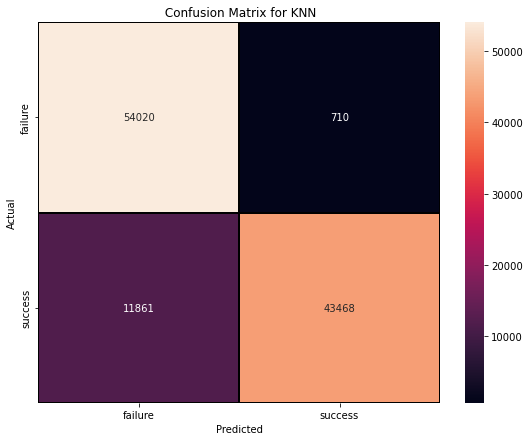

In [77]:
# Lets visualize confusion matrix
cm=confusion_matrix(y_test, pred_k)
x_axis_labels=['failure','success']
y_axis_labels=['failure','success']
f,ax=plt.subplots(figsize=(9,7))
sns.heatmap(cm, annot=True, linewidth=.2, linecolor='black',fmt='.0f',ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.title(" Confusion Matrix for KNN")
plt.show()

# 2) ExtraTreesClassifier:

In [78]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_e=etc.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred_e))
print("Confusion Matrix: ", confusion_matrix(y_test,pred_e))
print(classification_report(y_test,pred_e))

Accuracy Score:  0.9614116065019671
Confusion Matrix:  [[53301  1429]
 [ 2818 52511]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     54730
           1       0.97      0.95      0.96     55329

    accuracy                           0.96    110059
   macro avg       0.96      0.96      0.96    110059
weighted avg       0.96      0.96      0.96    110059



Here we have got an excellent accuracy score of 96.14% using Extra Tree Classifier.

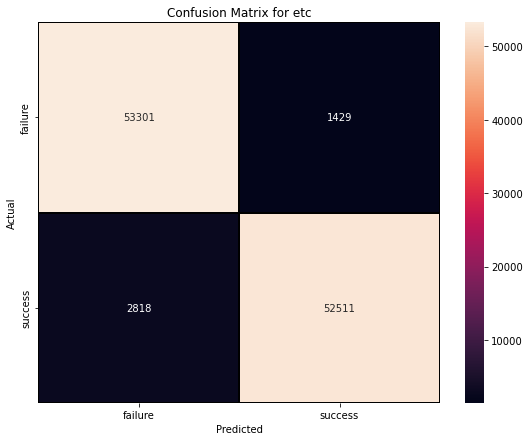

In [79]:
# lets visualize confusion matrix
cm=confusion_matrix(y_test,pred_e)
x_axis_labels=['failure','success']
y_axis_labels=['failure','success']
f,ax=plt.subplots(figsize=(9,7))
sns.heatmap(cm, annot=True, linewidth=.2, linecolor='black',fmt='.0f',ax=ax,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.title('Confusion Matrix for etc')
plt.show()

# 3) Gradient Boosting Classifier:

In [80]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_g=gbc.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,pred_g))
print('Confusion Matrix: ',confusion_matrix(y_test,pred_g))
print(classification_report(y_test,pred_g))

Accuracy Score:  0.8989632833298503
Confusion Matrix:  [[49898  4832]
 [ 6288 49041]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     54730
           1       0.91      0.89      0.90     55329

    accuracy                           0.90    110059
   macro avg       0.90      0.90      0.90    110059
weighted avg       0.90      0.90      0.90    110059



Here we have got accuracy score of 89.90% using GradientBoostingClassifier.

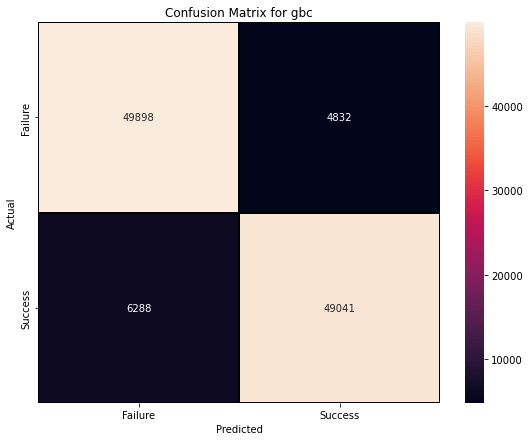

In [81]:
cm=confusion_matrix(y_test,pred_g)
y_axis_labels=['Failure','Success']
x_axis_labels=["Failure","Success"]
f,ax=plt.subplots(figsize=(9,7))
sns.heatmap(cm,annot=True, linewidth=.2, linecolor='black',fmt='.0f',ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for gbc')
plt.show()

# 4) Decision Tree Classifier:

In [82]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_d=dtc.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred_d))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_d))
print(classification_report(y_test,pred_d))

Accuracy Score:  0.9091850734605984
Confusion Matrix:  [[50196  4534]
 [ 5461 49868]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     54730
           1       0.92      0.90      0.91     55329

    accuracy                           0.91    110059
   macro avg       0.91      0.91      0.91    110059
weighted avg       0.91      0.91      0.91    110059



Here we have got the accuracy score of 90.92% using DecisionTreeMatrix

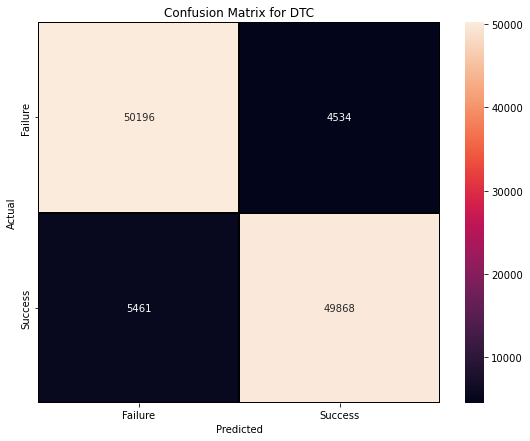

In [83]:
cm=confusion_matrix(y_test,pred_d)
x_axis_labels=['Failure','Success']
y_axis_labels=['Failure','Success']
f,ax=plt.subplots(figsize=(9,7))
sns.heatmap(cm,annot=True, linewidth=.2, linecolor='black',fmt='.0f',ax=ax,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for DTC')
plt.show()

# 5) Random Forest Classifier:

In [84]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_r=rfc.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred_r))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_r))
print(classification_report(y_test,pred_r))

Accuracy Score:  0.9522710546161605
Confusion Matrix:  [[52174  2556]
 [ 2697 52632]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     54730
           1       0.95      0.95      0.95     55329

    accuracy                           0.95    110059
   macro avg       0.95      0.95      0.95    110059
weighted avg       0.95      0.95      0.95    110059



Here we have got accuracy score of 95.23% using Random Forest Classifier

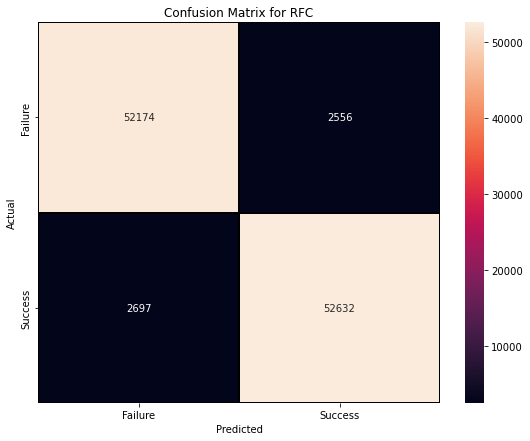

In [85]:
cm=confusion_matrix(y_test,pred_r)
x_axis_labels=['Failure','Success']
y_axis_labels=['Failure','Success']
f,ax=plt.subplots(figsize=(9,7))
sns.heatmap(cm,annot=True, linewidth=.2, linecolor='black',fmt='.0f',ax=ax,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RFC')
plt.show()

# Cross Validation Scores:

In [86]:
# lets check Cross Validation scores of all the models
# lets import all the required libraries
from sklearn.model_selection import cross_val_score

In [87]:
# cvs score of KNN
print(cross_val_score(knn,x,y,cv=5).mean())

0.892837087426795


In [88]:
# cvs score of ETC
print(cross_val_score(etc,x,y,cv=5).mean())

0.9660199465459552


In [89]:
# cvs score of GBC
print(cross_val_score(gbc,x,y,cv=5).mean())

0.8964543611089807


In [90]:
#cvs score of DTC
print(cross_val_score(dtc,x,y,cv=5).mean())

0.9094429260655426


In [91]:
#cvs score of RFC
print(cross_val_score(rfc,x,y,cv=5).mean())

0.9519384833935896



Here we can see cross validation score of all the models

Here we are selecting Random Forest Classifier as our best model which have least difference between accuracy_score 95.23% and cross_val_score 95.19%.

# Hyper Parameter Tuning:

In [92]:
# lets import all required libraries for hyper parameter tuning.
from sklearn.model_selection import GridSearchCV

In [93]:
parameters={'criterion':['gini', 'entropy'],
           'n_estimators':[100,200,300],
           'max_features':['auto', 'sqrt', 'log2'],
           }

In [94]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [95]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [96]:
gcv.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 300}

In [97]:
model=RandomForestClassifier(criterion='entropy',n_estimators=300 ,max_features='sqrt')
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',(accuracy_score(y_test,pred)*100))
print('Confusion Matrix: ',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score:  95.34431532178196
Confusion Matrix:  [[52172  2558]
 [ 2566 52763]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     54730
           1       0.95      0.95      0.95     55329

    accuracy                           0.95    110059
   macro avg       0.95      0.95      0.95    110059
weighted avg       0.95      0.95      0.95    110059



Here we have got excellent accuracy score of 95.34% using Random Forest Classifier. After HyperTuning we got improvement of 0.11%.

Now lets save our model and start Prediction.

# ROC-AUC Curve:

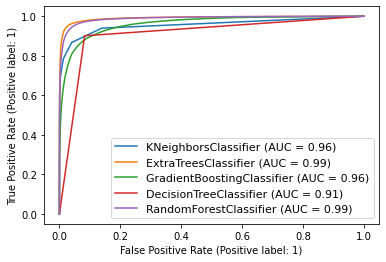

In [98]:
# lets import all required libraries
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
disp= plot_roc_curve(knn,x_test,y_test)
#ax_=Axes with confusion matrix
plot_roc_curve(etc,x_test,y_test, ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test, ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test, ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

Here are the TOC Curves for all the models that i have used in model Selection and also all the AUC values can also be seen in the plot itself.

# Saving The Model:

In [99]:
# saving the model as .pkl file
# importing library for sving the model
import joblib
joblib.dump(model,"MicroCredit_Defaulter.pkl")

['MicroCredit_Defaulter.pkl']

Here we have successfully saved the model in .pkl format.

# Loading Model and Predicting:

In [100]:
# loading the saved model
model=joblib.load("MicroCredit_Defaulter.pkl")

# predictions using our best model
prediction= model.predict(x_test)
prediction

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

Here we have successfully loaded the saved model and started predicting.

In [101]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,110049,110050,110051,110052,110053,110054,110055,110056,110057,110058
Predicted,1,1,0,1,0,0,0,0,0,0,...,0,1,1,1,0,1,0,0,0,0
Actual,1,1,0,1,0,0,0,0,0,0,...,0,1,1,1,1,1,0,0,0,0


Here we are getting most of the predicitions are accurate and actual values.

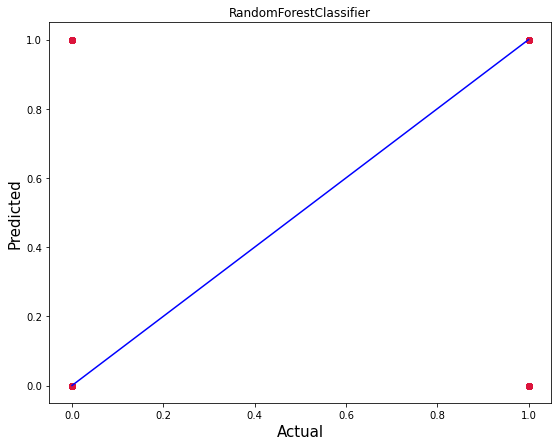

In [102]:
plt.figure(figsize=(9,7))
plt.scatter(y_test, prediction, c='crimson')
p1= max(max(prediction), max(y_test))
p2= min(min(prediction), min(y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("RandomForestClassifier")
plt.show()

Here in the picture we can see Actual vs Predicted, Blue line refers to Actual Values and red dots are predicted values.

### Conclusion:

In this project report, we used machine learning algorithms to predict the Micro-Credit Defaulters. We used proper procedure to analyze the dataset and finding the correlation between the features.

Here we selected the features which are correlated to each other and are independent in nature. Visualization helped us in understanding the data by graphical representation it made things easy for us to understand what data is trying to say.

Data cleaning is one of the most important steps to remove unrealistic 0 values and columns which had morethan 90% 0 values.
Using these feature we deployed 5 algorithms to find the best model and a hyper parameter tunning was done to the best model and we succeded in improvement of accuracy score.

Then we saved the best model and predicted the label. Our model’s performance felt good when we saw the predicted and actual values were almost same it felt really good observing good performance by our model.

To conclude, the Project Micro Credit Defaulter , We hope this study will move a small step ahead in providing some methodological and empirical contributions to crediting institutes, and presenting an alternative approach to the valuation of defaulters.